#  House Prices Dataset
---
**Name:** Ronald Wanjohi Gachoka <br>
**Student Number:** S2274825 <br>
**Course:** Software Development for Data Science <br>
**Assignment:** Coursework 1 <br>
**Program:** MSc Financial Technology 

## 1. Overview

This main objective of this coursework is to perform exploratory data analysis techniques on the 2 datasets that are related to residential properties. 

The goal of this project will be:
> - To understand the factors that influence property price
> - Determine which year had the highest property sales
> - What type of properties were the best to own based on their sale price and neighborhood

**Methodology**
To achieve these goals, the coursework will involve the following steps:
> - Data understanding
> - Data pre-processing (cleaning)
> - Univariate and bivariate analysis to understand relationships and trends
> - Visualizations
> - Conclusion

This coursework project will follow part of the CRISP-DM methodology (Smart Vision, 2020) as it will involve the following steps:
> - Business Understanding
> - Data Understanding
> - Data Preparation
> - Data Modelling, Deployment and Evaluation (Not included in this project)


## 2. Data Understanding

The 2 datasets presented to us are from the sale of properties in a small town in USA between 2006 and 2010.

The first dataset describes individual minute elements of the residential properties from:
- lot coverage, number of bedrooms, type of foundation, zoning class amongst many more

The 2nd dataset is much smaller but describes:
- the parcel number, type of property and the price it was sold at.

**Important notes** (from data dictionary)
- To deal with some of the clear outliers, we are recommended to remove any properties with more than 4,000 square feet.

**Load libraries**

In [123]:
# Data analysis
import pandas as pd
import numpy as np

# Statistics
import scipy.stats as stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Encoding
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Styling
sns.set_style("whitegrid")

In [4]:
# Importing data
housing_df = pd.read_csv("data/Housing_1.txt", sep="\t")
sales_df = pd.read_csv("data/Housing_2.txt", sep="\t")

# Replacing the space in columns names with "_"
housing_df.columns = housing_df.columns.str.replace(" ","_")
sales_df.columns = sales_df.columns.str.replace(" ","_")

# quick overview
housing_df.head()

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [5]:
sales_df.head()

,Order,PID,MS_SubClass,SalePrice
0,1,526301100,20,215000
1,2,526350040,20,105000
2,3,526351010,20,172000
3,4,526353030,20,244000
4,5,527105010,60,189900


Using `.head()` is useful as it helps quickly preview the data we have and check for any errors or unexpected values.

In the above case with housing_df we can see that there's a mixture of numerical and categorical data as well as some rows with a value of `0` which could be either missing values or a valid value.

In the case of sales_df, we can see that there's only numerical data and nothing out of the ordinary.

In [6]:
# Describe the data
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2933 non-null   int64  
 1   PID              2933 non-null   int64  
 2   MS_SubClass      2933 non-null   int64  
 3   MS_Zoning        2933 non-null   object 
 4   Lot_Frontage     2443 non-null   float64
 5   Lot_Area         2933 non-null   int64  
 6   Street           2933 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot_Shape        2933 non-null   object 
 9   Land_Contour     2933 non-null   object 
 10  Utilities        2933 non-null   object 
 11  Lot_Config       2933 non-null   object 
 12  Land_Slope       2933 non-null   object 
 13  Neighborhood     2933 non-null   object 
 14  Condition_1      2933 non-null   object 
 15  Condition_2      2933 non-null   object 
 16  Bldg_Type        2933 non-null   object 
 17  House_Style   

In [7]:
# Describe the data
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Order        2933 non-null   int64
 1   PID          2933 non-null   int64
 2   MS_SubClass  2933 non-null   int64
 3   SalePrice    2933 non-null   int64
dtypes: int64(4)
memory usage: 91.8 KB


From the above lines of code, we see that:
- several columns have multiple missing values in the housing_df dataset
- some columns have the wrong data type
- there are no missing values in the sales_df dataset

In [8]:
# Shape of the data
print("Shape of the housing dataset:")
housing_df.shape

Shape of the housing dataset:


(2933, 81)

In [9]:
print("Shape of the sales_df dataset:")
sales_df.shape

Shape of the sales_df dataset:


(2933, 4)

From the above lines of code, we see that: 
- housing_df has 2933 rows and 81 columns
- sales_df has 2933 rows and 4 columns

In [10]:
# Summary statistics (numerical columns)
housing_df.describe()

,Order,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Mas_Vnr_Area,...,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold
count,2933.000000,2.933000e+03,2933.000000,2443.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2910.000000,...,2932.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000
mean,1464.151381,7.142811e+08,57.349131,69.237822,10147.789976,6.094102,5.562564,1971.344016,1984.241050,102.082818,...,472.749659,93.655984,47.501534,22.988067,2.589840,16.088987,2.241050,50.583362,6.270031,2007.792704
std,846.579702,1.887213e+08,42.632965,23.354888,7876.008408,1.410595,1.111114,30.232331,20.864849,179.172166,...,214.957946,126.332461,67.457316,64.110459,25.128602,56.171408,35.579037,566.056789,3.570864,1.317834
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,731.000000,5.284770e+08,20.000000,58.000000,7441.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1464.000000,5.354532e+08,50.000000,68.000000,9439.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.000000,9.071811e+08,70.000000,80.000000,11553.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2930.000000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,120.000000,2010.000000


In [11]:
# Summary statistics (categorical columns)
housing_df.describe(include="object")

,MS_Zoning,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,...,Garage_Type,Garage_Finish,Garage_Qual,Garage_Cond,Paved_Drive,Pool_QC,Fence,Misc_Feature,Sale_Type,Sale_Condition
count,2933,2933,198,2933,2933,2933,2933,2933,2933,2933,...,2776,2774,2774,2774,2933,13,573,106,2933,2933
unique,7,2,2,4,4,3,5,3,28,9,...,6,3,5,5,3,4,4,5,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2276,2921,120,1861,2636,2930,2143,2792,446,2524,...,1734,1233,2618,2668,2655,4,330,95,2539,2416


From the above summary statistics we can derive lots of useful information from this dataset (both numerical and categorical columns) such as:
- The maximum Order number is 2930 while we have 2933 rows, check for duplicates
- Lot area has a maximum value of 215,245 while the average is 10,000. Check for outliers 
- The oldest house in the dataset was built in 1872, it would be interesting to see how much this was sold for
- The largest property has 8 bedrooms, identify which property this is and possibly its sale price compared to rest
- 
- Within the categorical columns, we can see the number of unique values each column had as well as how many times the most frequent value appeared
    - This will be useful in identifying the most popular values within the dataset
    - We can also see the number of missing values within each column

In [12]:
# Summary statistics
sales_df.describe()

,Order,PID,MS_SubClass,SalePrice
count,2933.000000,2.933000e+03,2933.000000,2933.000000
mean,1464.151381,7.142811e+08,57.349131,180759.629731
std,846.579702,1.887213e+08,42.632965,79858.300395
min,1.000000,5.263011e+08,20.000000,12789.000000
25%,731.000000,5.284770e+08,20.000000,129500.000000
50%,1464.000000,5.354532e+08,50.000000,160000.000000
75%,2197.000000,9.071811e+08,70.000000,213500.000000
max,2930.000000,1.007100e+09,190.000000,755000.000000


Similar to the Housing_df, we can draw similar insights for Order, PID and MS_Subclass but we will confirm if all the output in both dataframes are identical later on.
Based of the sales_df summary statistics we can see that:
- There is also a discrepancy between the Order numbers and maximum value
- The average sale price is 180,000 while the max is 755,000 -> This could be an outlier, do more research

### Data Dictionary

The data dictionary is a useful tool to help us understand the data and the meaning of each column. This will help us understand the data better and help us identify any potential issues with the data.

In [13]:
# Identifying all object columns in the housing_df
for name, label in housing_df.items():
    if pd.api.types.is_object_dtype(label):
        print(name)

MS_Zoning
Street
Alley
Lot_Shape
Land_Contour
Utilities
Lot_Config
Land_Slope
Neighborhood
Condition_1
Condition_2
Bldg_Type
House_Style
Roof_Style
Roof_Matl
Exterior_1st
Exterior_2nd
Mas_Vnr_Type
Exter_Qual
Exter_Cond
Foundation
Bsmt_Qual
Bsmt_Cond
Bsmt_Exposure
BsmtFin_Type_1
BsmtFin_Type_2
Heating
Heating_QC
Central_Air
Electrical
Kitchen_Qual
Functional
Fireplace_Qu
Garage_Type
Garage_Finish
Garage_Qual
Garage_Cond
Paved_Drive
Pool_QC
Fence
Misc_Feature
Sale_Type
Sale_Condition


From the above code, we can see that there are no object type columns in the dataset. From our analysis we'll need to change the following column to object type:
- MS_SubClass

In [14]:
# identifying all numeric columns in the housing_df
for name, label in housing_df.items():
    if pd.api.types.is_numeric_dtype(label):
        print(name)

Order
PID
MS_SubClass
Lot_Frontage
Lot_Area
Overall_Qual
Overall_Cond
Year_Built
Year_Remod/Add
Mas_Vnr_Area
BsmtFin_SF_1
BsmtFin_SF_2
Bsmt_Unf_SF
Total_Bsmt_SF
1st_Flr_SF
2nd_Flr_SF
Low_Qual_Fin_SF
Gr_Liv_Area
Bsmt_Full_Bath
Bsmt_Half_Bath
Full_Bath
Half_Bath
Bedroom_AbvGr
Kitchen_AbvGr
TotRms_AbvGrd
Fireplaces
Garage_Yr_Blt
Garage_Cars
Garage_Area
Wood_Deck_SF
Open_Porch_SF
Enclosed_Porch
3Ssn_Porch
Screen_Porch
Pool_Area
Misc_Val
Mo_Sold
Yr_Sold


In [15]:
# Identifying all object columns in the sales_df
for name, label in sales_df.items():
    if pd.api.types.is_object_dtype(label):
        print(name)

From the above code, we can see that there are no object(categorical) type columns in the dataset. From our analysis we'll need to change the following column to object type:

In [16]:
# identifying all numeric columns in the sales_df
for name, label in sales_df.items():
    if pd.api.types.is_numeric_dtype(label):
        print(name)

Order
PID
MS_SubClass
SalePrice


Based of the code above, we can make the following conclusions about the variables we have in our dataset


|  **Variable**  |  **Description**  | **Type** | **Subtype** | 
|:--------------:|:-----------------:|:--------:|:-----------:|
| Order | Observation Number | Numerical |  Discrete   |
| PID | Parcel Identification Number | Numerical |   Nominal   |
| MS_SubClass | Identifies the type of dwelling involved in the sale | Numerical |   Nominal   |
| MS_Zoning | Identifies the general zoning classification of the sale | Categorical |   Nominal   |
| Lot_Frontage | Linear feet of street connected to property | Numerical | Continuous  |
| Lot_Area | Lot size in square feet | Numerical | Continuous  |
| Street | Type of road access to property | Categorical |   Nominal   |




## 3. Data Preparation

This stage will include:
- Initial Data cleaning (checking for duplicates)
- Merging the 2 datasets
- Data cleaning
    - Checking for missing values, outliers, duplicates
- Data transformation
    - Adjusting data types
    - Creating new columns from existing ones
    - Dropping columns that aren't crucial

### 3.1 Initial Data Cleaning

This stage will check for duplicates in both dataframes and remove them if they exist before merging the 2 datasets.

In [17]:
# Housing_df duplicates
housing_df[housing_df.duplicated(keep=False)].sort_values(by="Order")

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition
145,146,535175070,20,RL,73.0,9300,Pave,NaN,Reg,Lvl,...,143,0,NaN,NaN,NaN,0,4,2010,WD,Normal
148,146,535175070,20,RL,73.0,9300,Pave,NaN,Reg,Lvl,...,143,0,NaN,NaN,NaN,0,4,2010,WD,Normal
146,147,535175180,20,RL,87.0,10725,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
149,147,535175180,20,RL,87.0,10725,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
147,148,535179020,20,RL,80.0,10032,Pave,NaN,Reg,Lvl,...,160,0,NaN,GdWo,NaN,0,6,2010,WD,Normal
150,148,535179020,20,RL,80.0,10032,Pave,NaN,Reg,Lvl,...,160,0,NaN,GdWo,NaN,0,6,2010,WD,Normal


From the above code, we can see that there are 3 duplicates in the housing_df dataset. We will remove these duplicates before merging the 2 datasets.

In [18]:
# Dropping duplicates
housing_df.drop_duplicates(inplace=True)

# Checking if we have any duplicates
housing_df.duplicated().sum()

0

In [19]:
# Sales_df duplicates
sales_df[sales_df.duplicated(keep=False)].sort_values(by="Order")

,Order,PID,MS_SubClass,SalePrice
145,146,535175070,20,167500
148,146,535175070,20,167500
146,147,535175180,20,108538
149,147,535175180,20,108538
147,148,535179020,20,159500
150,148,535179020,20,159500


In [20]:
# Dropping duplicates
sales_df.drop_duplicates(inplace=True)

# Checking if we have any duplicates
sales_df.duplicated().sum()

0

Similarly,we can see that there were 3 duplicates in the sales_df dataset. We will remove these duplicates before merging the 2 datasets.

### 3.2 Merging the 2 datasets

Before merging the dataframes, we need to ensure that we have matching PID and MS SubClass in both dataframes

In [21]:
# Comparing whether the PID values and MS Subclass are identical in both df

equal_pid = housing_df["PID"].isin(sales_df["PID"]).all()
equal_subclass = housing_df["MS_SubClass"].isin(sales_df["MS_SubClass"]).all()

if equal_pid and equal_subclass:
    print("Both PID and MS SubClass are identical in both df")
else:
    print("They aren't identical. Perform further analysis")

Both PID and MS SubClass are identical in both df


In [22]:
# Merging both the housing and sales dataframes
df = housing_df.merge(sales_df, on=["PID","MS_SubClass","Order"],
                      how="inner")
df.head()

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [23]:
# Checking the length of the dataframes
print(f"Length of the housing_df is: {len(housing_df)}")
print(f"Length of the sales_df is: {len(sales_df)}")
print(f"Length of the merged df is: {len(df)}")

Length of the housing_df is: 2930
Length of the sales_df is: 2930
Length of the merged df is: 2930


### 3.3 Checking for missing values

This stage will check for missing values in the merged dataframe and deal with them accordingly.

In [24]:
# Total number of NA values
print("Total number of missing values in the dataframe:")
df.isna().sum().sum()

Total number of missing values in the dataframe:


15749

We will deal with the missing values in different ways depending on the column:
1. Either drop the NA values
2. Impute the missing values
3. Do nothing to them if they are valid values

In [25]:
# Columns with na values
nan_columns = df.columns[df.isna().any()].tolist()

# Sum of the na values in the dataset
nan_values = df[nan_columns].isna().sum()

# Percentage of na values
nan_percentage = (nan_values / len(df)) * 100

# Creating a dataframe to display the results
nan_df = pd.DataFrame({"Missing values": nan_values,
                       "Percentage of missing values": nan_percentage})

# Sorting the dataframe
nan_df.sort_values(by="Percentage of missing values", ascending=False, inplace=True)
nan_df

,Missing values,Percentage of missing values
Pool_QC,2917,99.556314
Misc_Feature,2824,96.382253
Alley,2732,93.242321
Fence,2358,80.477816
Mas_Vnr_Type,1775,60.580205
Fireplace_Qu,1422,48.532423
Lot_Frontage,490,16.723549
Garage_Cond,159,5.426621
Garage_Qual,159,5.426621
Garage_Finish,159,5.426621


Looking at the above dataframe, we can see the amount of NA values in the dataset as well as its proportion to the whole dataset. 
For this project, we will drop all columns with **more than 10% of missing values**. This is because we have a large dataset and imputing over them will cause a lot of noise in the data.

In addition, dropping them makes sense over imputing them as some columns such as `Pool_QC` and `Misc_Feature` have more than 90% of missing values. Looking at the data dictionary we see that "NA" means that the property doesn't have the feature or pool. Therefore, we can safely assume that the missing values are valid and we can drop them.

#### 3.3.1 Dropping columns with more than 10% of NA values


In [26]:
# Dropping columns with more than 10% of NA values
# Columns to drop
columns_to_drop = nan_df[nan_df["Percentage of missing values"] > 10].index.tolist()
print(columns_to_drop)

# Drop columns
housing_df.drop(columns=columns_to_drop, inplace=True)

print(f"Number of columns in the dataset was: {len(housing_df.columns) + len(columns_to_drop)}")
print(f"Number of columns to drop is: {len(columns_to_drop)}")
print(f"Number of columns in the updated dataset is: {len(housing_df.columns)}")

['Pool_QC', 'Misc_Feature', 'Alley', 'Fence', 'Mas_Vnr_Type', 'Fireplace_Qu', 'Lot_Frontage']
Number of columns in the dataset was: 81
Number of columns to drop is: 7
Number of columns in the updated dataset is: 74


In [27]:
# Update nan_df 
nan_df = nan_df[~nan_df.index.isin(columns_to_drop)]

# Updating the original df
df = df.drop(columns=columns_to_drop)

# Checking the shape of the df
df.shape

(2930, 75)

Looking at the shape of the original df, we can see that the number of columns has dropped from 81 to 75. This is because we dropped the columns that had more than 10% of missing values.

#### 3.3.2 Columns to leave as they are

he first set of missing values we will deal with are columns that are correctly labelled as NA.
How we identified columns labeled as NA, is by going through the data dictionary provided and seeing if any columns were meant to have an NA value (eg. If property doesn't have a pool, the value associated with it in the dictionary is NA).

In [28]:
# Correctly labelled NA values
correct_na_cols = ["Bsmt_Qual","Bsmt_Cond","Bsmt_Exposure","BsmtFin_Type_1",
            "BsmtFin_Type_2","Garage_Type","Garage_Finish","Garage_Qual",
            "Garage_Cond"]

# Remove the columns from the nan_df
nan_df = nan_df[~nan_df.index.isin(correct_na_cols)]

# View the updated df
nan_df


,Missing values,Percentage of missing values
Garage_Yr_Blt,159,5.426621
Mas_Vnr_Area,23,0.784983
Bsmt_Half_Bath,2,0.068259
Bsmt_Full_Bath,2,0.068259
BsmtFin_SF_1,1,0.034130
Garage_Cars,1,0.034130
Garage_Area,1,0.034130
Total_Bsmt_SF,1,0.034130
Bsmt_Unf_SF,1,0.034130
BsmtFin_SF_2,1,0.034130


Based of the updated dataframe, we can see that the columns above consist of values that can now be imputed with the (assumed) correct values.
The 2 main imputation methods we will use will be either:
1. Mean
2. Median

#### 3.3.3 Imputing missing values

Kumar (2023a) gives us a guide on which method to use for imputing missing values depending on the type of data we have.
- **Mean Imputation**  is used for continuous data that is normally distributed
- **Median Imputation** is used for continuous data that is skewed as it is less sensitive to outliers
- **Mode Imputation** is used for categorical data


In [29]:
# Median Imputation
median_cols = ["Garage_Yr_Blt", "Bsmt_Full_Bath", "Bsmt_Half_Bath", "Garage_Cars"]

for col in median_cols:
    df[col].fillna(df[col].median(), inplace=True)

df[median_cols].isna().sum()

Garage_Yr_Blt     0
Bsmt_Full_Bath    0
Bsmt_Half_Bath    0
Garage_Cars       0
dtype: int64

From the above output we can see that the missing values in the columns have been imputed with the median values and we no longer have missing values present.

We chose to use median imputation for these columns as for e.g.the "Garage_Yr_Blt" column, it made most sense to fill it with a year that was within the dataset rather than a year that was not present in the dataset (mean year which can be e.g. 2000.5 or 2000.2).

That was the same reasoning used for the selection of the other columns as they were discrete and we would expect similar discrete values to be present in the dataset after imputation.

In [30]:
# Mean Imputation
mean_cols = ["Mas_Vnr_Area","BsmtFin_SF_1", "BsmtFin_SF_2", "Bsmt_Unf_SF",
             "Total_Bsmt_SF", "Garage_Area"]

for col in mean_cols:
    df[col].fillna(df[col].mean(), inplace=True)

df[mean_cols].isna().sum()

Mas_Vnr_Area     0
BsmtFin_SF_1     0
BsmtFin_SF_2     0
Bsmt_Unf_SF      0
Total_Bsmt_SF    0
Garage_Area      0
dtype: int64

From the above output we can see that the missing values in the columns have been imputed with the mean values and we no longer have NA values present.
We decided to use mean imputation for these columns as they were continuous (this  and we would expect similar continuous values to be present in the dataset after imputation.

In [31]:
def plot_dist(df:pd.DataFrame, columns:str, title:str, xlabel:str, ylabel:str, kde:bool = True):
    """
    This function plot the distribution of the stated columns in a dataframe.
    
    :param df: Dataframe to be used
    :param columns: Columns for visualizing
    :param title: Title for distribution
    :param xlabel: X label 
    :param ylabel: Y label
    
    """
    print("Summary statistics:")
    print(df[columns].describe())

    fig, (ax_box, ax_hist) = plt.subplots(nrows=2, ncols=1,
                                          sharex=True, figsize=(8,4),
                                          gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(df[columns], ax=ax_box, color="salmon", orient="h")
    sns.histplot(df[columns], ax=ax_hist, color="steelblue", kde=kde)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.suptitle(title)


### 3.4 Checking for outliers

This section of the report will look at outliers seen from the summary statistics conducted above. 
The benefit of checking for outliers and removing them, if need be, ensures that your data will no

Starting of we'll look at the distribution of lot sizes following the suggestion on the data dictionary

Summary statistics:
count    2930.000000
mean     1499.690444
std       505.508887
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.750000
max      5642.000000
Name: Gr_Liv_Area, dtype: float64


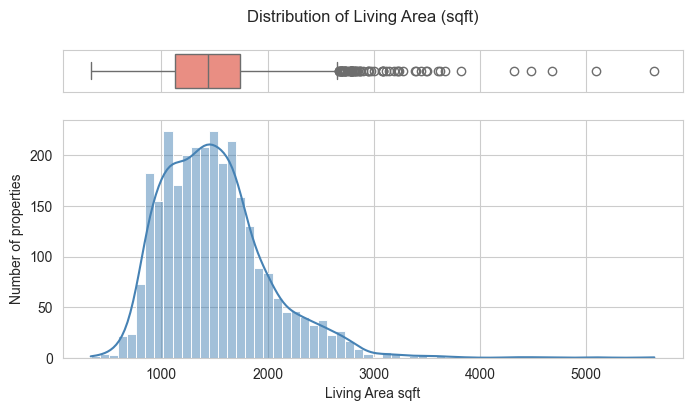

In [32]:
# Visualizing the living area
plot_dist(df, columns="Gr_Liv_Area", title="Distribution of Living Area (sqft)",
          xlabel="Living Area sqft", ylabel="Number of properties")

Similar observations can be made to what were in the special notes in the data dictionary. There are clear outliers in this dataset, finding houses with more than 4,000 sqft is highly unlikely. To confirm this we will follow the special notes and check the distribution between the "Sale Price" and "GR Liv Area".

Looking at the visualization above, we can also conclude that the data in the dataframe is right skewed, this could most likely be due to the outliers and other large properties

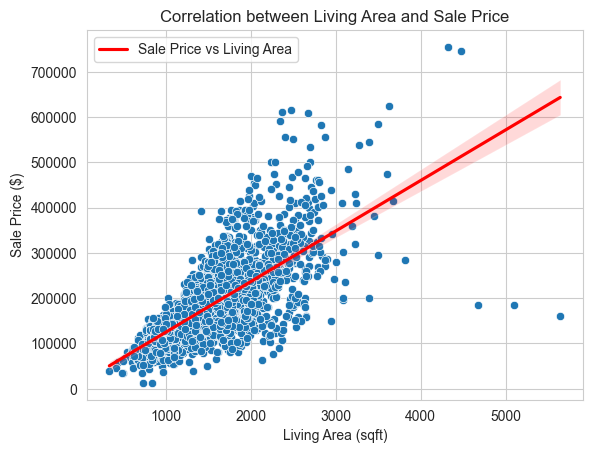

In [33]:
sns.scatterplot(data=df, x="Gr_Liv_Area", y="SalePrice")
sns.regplot(data=df, x="Gr_Liv_Area", y="SalePrice", scatter=False,
            color="red", label="Sale Price vs Living Area")
plt.title("Correlation between Living Area and Sale Price")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Sale Price ($)")
plt.legend();

Looking at the graph above, we can share the same conclusions with the special note that we should drop houses with a Gr Living Area greater than 4000.
We see that 3 properties have really high living areas > 4000 but low sale prices, and secondly, 2 more properties with > 4000 living area and really high sales prices.

We can also see that there is a positive correlation between the living area and sales price of a property. 

In [34]:
# Dropping outliers
df.drop(df[df["Gr_Liv_Area"]>4000].index, inplace=True)

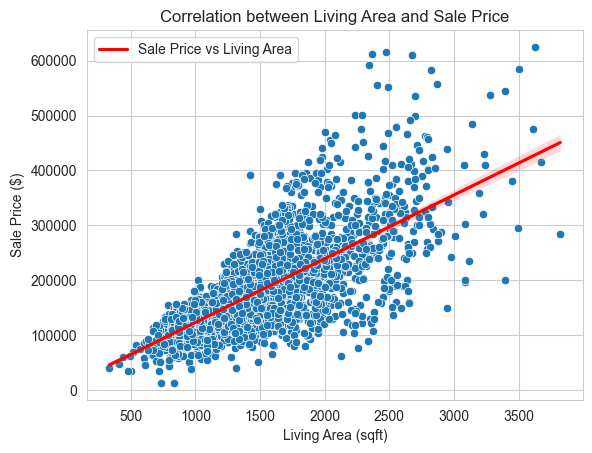

In [35]:
# Updated chart after removing outliers
sns.scatterplot(data=df, x="Gr_Liv_Area", y="SalePrice")
sns.regplot(data=df, x="Gr_Liv_Area", y="SalePrice", scatter=False,
            color="red", label="Sale Price vs Living Area")
plt.title("Correlation between Living Area and Sale Price")
plt.xlabel("Living Area (sqft)")
plt.ylabel("Sale Price ($)")
plt.legend();

From the graph above, we can see that the outliers have been removed and the data is much more representative of the data. 
We can also see that the correlation between the living area and sale price is positive and strong. This makes sense as the larger the living area, the more expensive a property will be.

While we still had the outlier within the dataset vs when we removed them, the line of best fit did not change much as there are a lot more properties with a living area of less than 3000 sqft and 5 outliers would have little effect on that.

Summary statistics:
count      2925.000000
mean      10103.583590
std        7781.999124
min        1300.000000
25%        7438.000000
50%        9428.000000
75%       11515.000000
max      215245.000000
Name: Lot_Area, dtype: float64


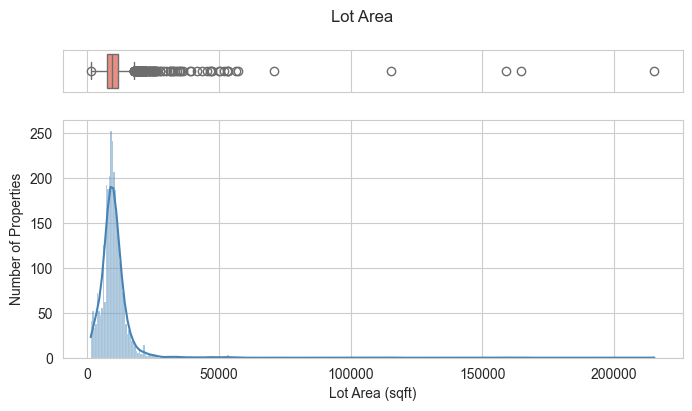

In [36]:
# Looking for outliers within Lot Area
plot_dist(df, columns="Lot_Area", title="Lot Area",
          xlabel="Lot Area (sqft)", ylabel="Number of Properties")

From the graph above, we can see that there are multiple outliers as the 75th percentile lot areas within the data is 11,515 sqft but there are a few more properties all the way up to and above 200,000 sqft.

We will drop all properties that are outside 99.7% of the data or greater than 3 standard deviations away from the mean. The use of 99.7% or a Z_Score of 3 is a statistically used method to identify outliers within any dataset (BecomingHuman.ai, 2020).

Summary statistics:
count     2899.000000
mean      9615.761297
std       3996.954394
min       1300.000000
25%       7411.000000
50%       9375.000000
75%      11427.000000
max      33120.000000
Name: Lot_Area, dtype: float64


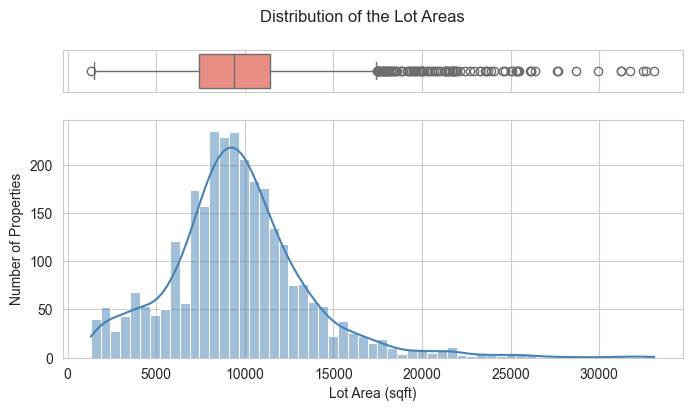

In [37]:
# Calculating the Z-scores for Lot_Area
z_score = stats.zscore(df["Lot_Area"])

# Setting threshold
z_score_threshold = 3

# Outliers
lot_area_outliers = abs(z_score) > z_score_threshold

# Removing outliers
df = df[~lot_area_outliers]

# Graphing the plot to see changes
plot_dist(df, columns="Lot_Area", title="Distribution of the Lot Areas",
          xlabel="Lot Area (sqft)", ylabel="Number of Properties")

From the new plot above and summary statistics we see that the maximum lot area has drastically dropped from 215,000 sqft to 33,000 sqft. This ensures that all the properties within the dataset fall within 99.7% of the dataset.

From the above plots we can now accurately see the plot is right skewed and can also see clearly where the 50% percentile of the data falls, close to 10,000 sqft.
Doing so has also reduced the number of properties in our dataset from 2934 to 2908.
We can also be comfortable with the change as the summary statistics for the lot_area will be more accurate and representative of the data. without such massive outliers.

Summary statistics:
count    2899.000000
mean       99.610426
std       172.427242
min         0.000000
25%         0.000000
50%         0.000000
75%       161.500000
max      1600.000000
Name: Mas_Vnr_Area, dtype: float64


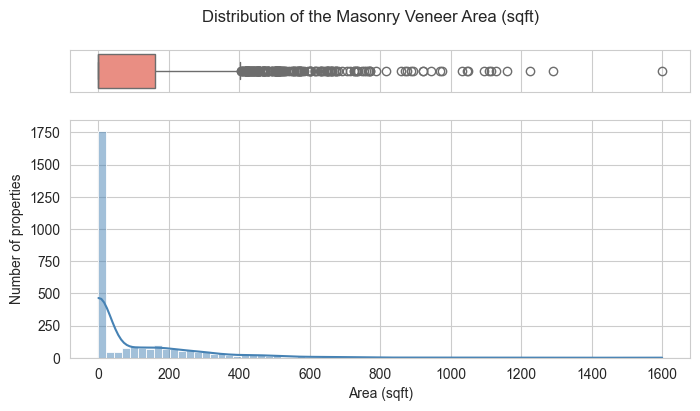

In [38]:
# Outliers within the Mas_Vnr_Area

plot_dist(df, columns="Mas_Vnr_Area", title="Distribution of the Masonry Veneer Area (sqft)",
          xlabel="Area (sqft)", ylabel="Number of properties")

From the above summary statistics we can see that 50% of the properties have a masonry veneer area of 0 sqft. This means that half of the properties in the dataset do not have a masonry veneer area (brick work around the house) 75% of the properties have a masonry veneer of 161.5 sqft and less while the maximum value is 1600 sqft.

Similarly, as we did with the lot area, we will remove all properties that are greater than 3 standard deviations away from the mean.

Summary statistics:
count    2838.000000
mean       84.214104
std       135.070538
min         0.000000
25%         0.000000
50%         0.000000
75%       144.750000
max       616.000000
Name: Mas_Vnr_Area, dtype: float64


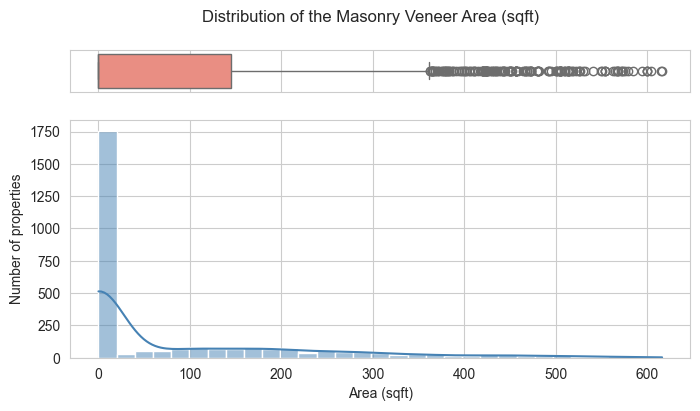

In [39]:
# Calculating Z score
veneer_z_score = stats.zscore(df["Mas_Vnr_Area"])

# Outliers
veneer_outliers = abs(veneer_z_score) > z_score_threshold

# Removing outliers
df = df[~veneer_outliers]

# Graphing the plot to see changes
plot_dist(df, columns="Mas_Vnr_Area", title="Distribution of the Masonry Veneer Area (sqft)",
          xlabel="Area (sqft)", ylabel="Number of properties")

We can see that the maximum value within the df has dropped from 1600 sqft to just over 600 sqft. This now ensures that all the points within the dataset fall within 99.7% of the dataset.


Summary statistics:
count    2838.000000
mean     1977.917900
std        24.810085
min      1895.000000
25%      1961.000000
50%      1979.000000
75%      2001.000000
max      2207.000000
Name: Garage_Yr_Blt, dtype: float64


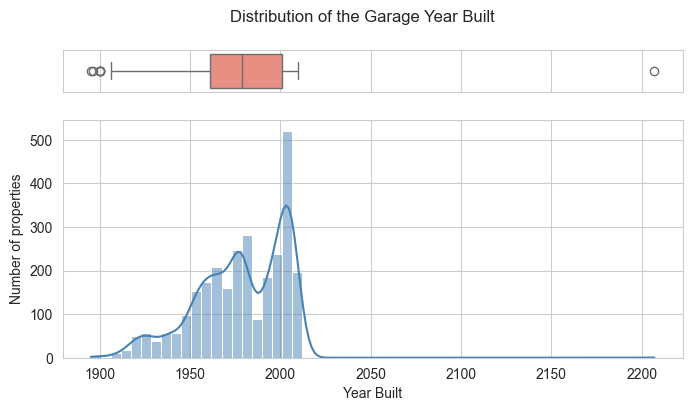

In [40]:
# Outliers within the Garage Year Built

plot_dist(df, columns="Garage_Yr_Blt", title="Distribution of the Garage Year Built",
          xlabel="Year Built", ylabel="Number of properties")

From both the summary statistics and the graph above we can see there is a very clear outlier within the dataset. We can see that the maximum year a garage was built was 2207 which is in the future. We will remove this outlier from the dataset as the properties in this dataset were sold between 2006 and 2010.

Summary statistics:
count    2837.000000
mean     1977.837152
std        24.438625
min      1895.000000
25%      1961.000000
50%      1979.000000
75%      2001.000000
max      2010.000000
Name: Garage_Yr_Blt, dtype: float64


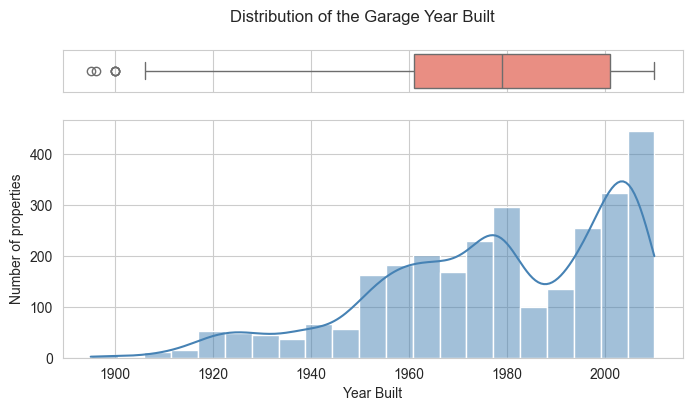

In [41]:
# Removing the outlier
df.drop(df[df["Garage_Yr_Blt"] > 2010].index, inplace=True)

# Graphing the plot to see changes
plot_dist(df, columns="Garage_Yr_Blt", title="Distribution of the Garage Year Built",
          xlabel="Year Built", ylabel="Number of properties")

### 3.5. Data Transformation

This stage of the project will look at:
- Creating new columns from the already existing ones
- Dropping columns that aren't needed
- Selecting columns that are needed for our analysis

#### 3.5.1 Creating new columns

We will create a new column to help us understand the age of the property at the time of its sale. This will help us understand if the age of the property has any effect on the price of the property.

In [42]:
df["House_Sale_Age"] = df["Yr_Sold"] - df["Year_Built"]
df["House_Sale_Age"].head()

0    50
1    49
2    52
3    42
4    13
Name: House_Sale_Age, dtype: int64

#### 3.5.2 Dropping Columns

The first set of columns we will drop are columns that will add little to no value in our analysis. Typically in an analysis, one would drop columns that are highly correlated to your target variable, however in this case we will opt to drop columns that have a low correlation to the target variable.

This is because we are trying to understand the factors that influence the price of a property and columns with low correlation do not provide much insight to the target variable. Therefore, we will drop columns that have a low correlation to the target variable. 

We will drop columns that have a correlation of less than 0.50 to the target variable or greater than -0.50.
The choice of (-/+)0.50 is because its a moderately strong correlation and we want to keep columns that have a strong correlation to the target variable.

In [43]:
# Copy of df
df_new = df.copy()

# correlation cut off
corr_cutoff = 0.50

In [44]:
df_new.head()

,Order,PID,MS_SubClass,MS_Zoning,Lot_Area,Street,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice,House_Sale_Age
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,5,2010,WD,Normal,215000,50
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,120,0,0,6,2010,WD,Normal,105000,49
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,12500,6,2010,WD,Normal,172000,52
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,4,2010,WD,Normal,244000,42
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,3,2010,WD,Normal,189900,13


##### 3.5.2.1 Dropping numerical columns

Due to the size of the dataframe,we will drop perform correlation analysis in batches of 10 columns at a time.
The following section will look whether the correlation of the numerical columns to the sale price is greater than 0.50 or less than -0.50

In [45]:
# Numerical columns
numerical_cols = df_new.select_dtypes(include=["int64","float64"]).iloc[:,:20]

# Add sale price to the dataframe
numerical_cols["SalePrice"] = df_new["SalePrice"]

numerical_cols.head()

,Order,PID,MS_SubClass,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Mas_Vnr_Area,BsmtFin_SF_1,...,Bsmt_Unf_SF,Total_Bsmt_SF,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,SalePrice
0,1,526301100,20,31770,6,5,1960,1960,112.0,639.0,...,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,215000
1,2,526350040,20,11622,5,6,1961,1961,0.0,468.0,...,270.0,882.0,896,0,0,896,0.0,0.0,1,105000
2,3,526351010,20,14267,6,6,1958,1958,108.0,923.0,...,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,172000
3,4,526353030,20,11160,7,5,1968,1968,0.0,1065.0,...,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,244000
4,5,527105010,60,13830,5,5,1997,1998,0.0,791.0,...,137.0,928.0,928,701,0,1629,0.0,0.0,2,189900


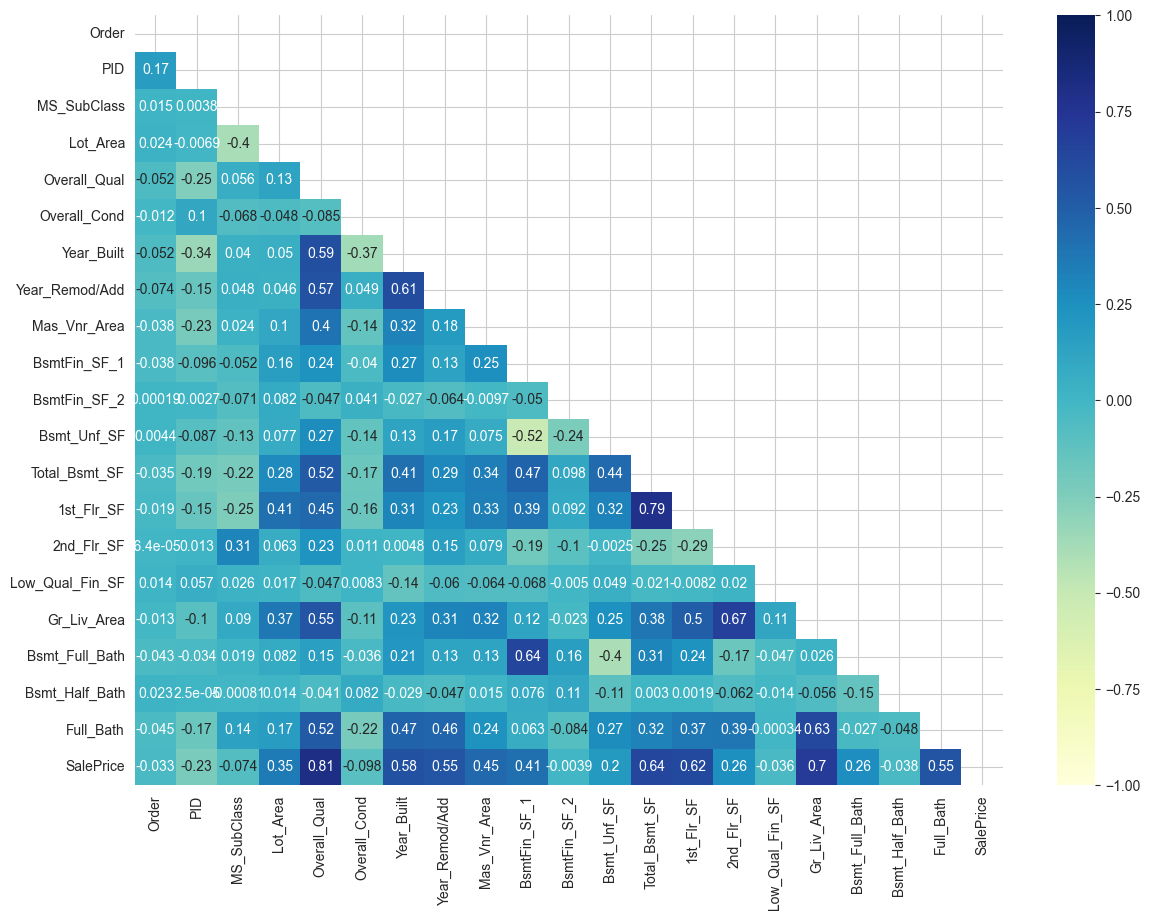

In [46]:
# Correlation matrix

corr_matrix = numerical_cols.corr()

mask = np.triu(np.ones_like(corr_matrix))

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, 
            annot=True, 
            mask=mask, 
            vmin=-1,
            vmax=1,
            cmap="YlGnBu");

From the above correlation matrix, our focus will be mainly the correlations between the target (SalePrice) and other columns. 

We can see that multiple columns against the SalePrice have a correlation grater than 0.50 and we will keep them in our analysis. We can also see that there are a number of columns that are correlated against each other.

We can also see that `Overall_Quality` had the highest correlation to the sales price which informs us that the quality of the property has a high correlation to the sales price. This is closely followed by `Gr_Liv_Area` and `Total_Bsmt_SF`

In [47]:
# Dropping columns with a correlation of less than 0.50

columns_to_drop = corr_matrix[abs(corr_matrix["SalePrice"]) < corr_cutoff].index.tolist()
print("Columns to drop:")
print(columns_to_drop)

# Drop columns

numerical_cols.drop(columns=columns_to_drop, inplace=True)

numerical_cols.head()

Columns to drop:
['Order', 'PID', 'MS_SubClass', 'Lot_Area', 'Overall_Cond', 'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', '2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath']


,Overall_Qual,Year_Built,Year_Remod/Add,Total_Bsmt_SF,1st_Flr_SF,Gr_Liv_Area,Full_Bath,SalePrice
0,6,1960,1960,1080.0,1656,1656,1,215000
1,5,1961,1961,882.0,896,896,1,105000
2,6,1958,1958,1329.0,1329,1329,1,172000
3,7,1968,1968,2110.0,2110,2110,2,244000
4,5,1997,1998,928.0,928,1629,2,189900


Above we have the first batch of columns we will keep for our analysis. Each of this columns in the table have a correlation of greater than 0.55 or less than -0.55 to the sales price. What's surprising is that Lot_Area had a low correlation to the sales price which shows that having a larger lot doesn't necessarily mean a higher sale price. 

In [48]:
# Checking the remaining numerical columns
numerical_cols_1 = df_new.select_dtypes(include=["int64","float64"]).iloc[:,20:]

# Add sale price to the dataframe
numerical_cols_1["SalePrice"] = df_new["SalePrice"]

numerical_cols_1.head()

,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Yr_Blt,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,SalePrice,House_Sale_Age
0,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000,50
1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000,49
2,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000,52
3,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000,42
4,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900,13


In [49]:
# Changing the position of the sale price column

house_price = numerical_cols_1["SalePrice"]
numerical_cols_1.drop(columns=["SalePrice"], inplace=True)

numerical_cols_1 = pd.concat([numerical_cols_1, house_price], axis=1)

numerical_cols_1.head()

,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Yr_Blt,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,House_Sale_Age,SalePrice
0,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,50,215000
1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,49,105000
2,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,52,172000
3,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,42,244000
4,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,13,189900


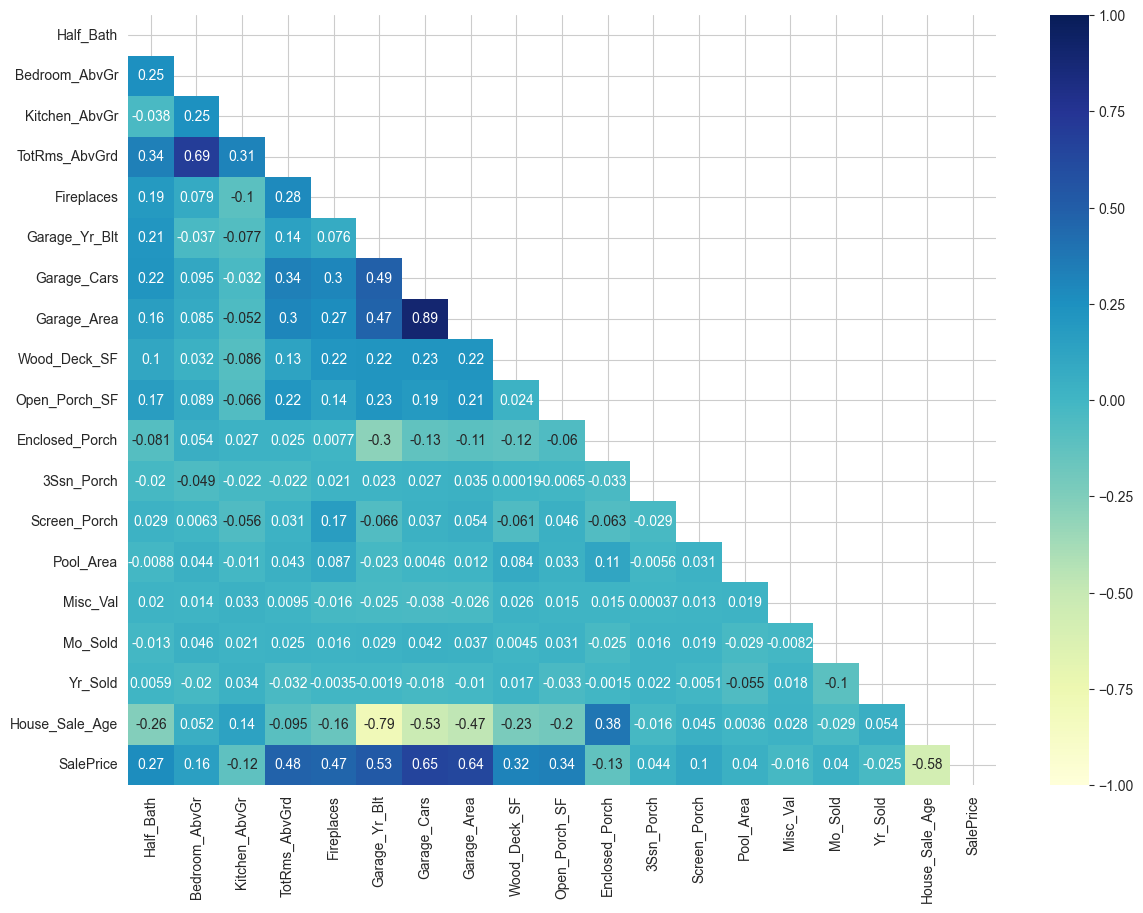

In [50]:
# Correlation matrix
corr_matrix = numerical_cols_1.corr()

plt.figure(figsize=(14,10))
mask = np.triu(np.ones_like(corr_matrix))
sns.heatmap(corr_matrix,
            annot=True,
            mask=mask,
            vmin=-1,
            vmax=1,
            cmap="YlGnBu");

From the above correlation matrix, we can see that `Garage_Cars` and `Garage_Area` are highly correlated to each other. This makes sense as the more cars a garage can hold, the larger the area of the garage. We will drop one of this columns as it will add little value to our analysis.

It's also interesting to see that the age of the house has a negative correlation with the sale price of a property. This means that the older the house, the lower the sale price. This is something we will explore further in our analysis.

In [51]:
# Dropping columns with a correlation of less than our cut-off
columns_to_drop = corr_matrix[abs(corr_matrix["SalePrice"]) < corr_cutoff].index.tolist()
print("Columns to drop:")
print(columns_to_drop)

# Drop columns
numerical_cols_1.drop(columns=columns_to_drop, inplace=True)
numerical_cols_1.drop(columns=["Garage_Cars"], inplace=True)

numerical_cols_1.head()

Columns to drop:
['Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces', 'Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch', '3Ssn_Porch', 'Screen_Porch', 'Pool_Area', 'Misc_Val', 'Mo_Sold', 'Yr_Sold']


,Garage_Yr_Blt,Garage_Area,House_Sale_Age,SalePrice
0,1960.0,528.0,50,215000
1,1961.0,730.0,49,105000
2,1958.0,312.0,52,172000
3,1968.0,522.0,42,244000
4,1997.0,482.0,13,189900


In [52]:
# Joining both dfs

df_updated = pd.concat([numerical_cols, numerical_cols_1], axis=1)
df_updated.head()

,Overall_Qual,Year_Built,Year_Remod/Add,Total_Bsmt_SF,1st_Flr_SF,Gr_Liv_Area,Full_Bath,SalePrice,Garage_Yr_Blt,Garage_Area,House_Sale_Age,SalePrice
0,6,1960,1960,1080.0,1656,1656,1,215000,1960.0,528.0,50,215000
1,5,1961,1961,882.0,896,896,1,105000,1961.0,730.0,49,105000
2,6,1958,1958,1329.0,1329,1329,1,172000,1958.0,312.0,52,172000
3,7,1968,1968,2110.0,2110,2110,2,244000,1968.0,522.0,42,244000
4,5,1997,1998,928.0,928,1629,2,189900,1997.0,482.0,13,189900


From the above code cells, we divided the numerical columns into 2 batches and dropped columns that had a correlation of less than 0.5 to the sales price.
The remaining columns had a correlation of greater than/ less than 0.5/-0.5 and we will keep them in our analysis as they had a positive or negative correlation to the sales price.

##### 3.5.2.2 Dropping categorical columns

The next section will deal with categorical columns and we will perform a similar analysis to the numerical columns by dropping columns that have a correlation of less than 0.5 or greater than -0.5 to the sales price.

The rationale used will be to filter out columns that have a low correlation to the sales price as they will add little value to our analysis. As we have to encode the labels to perform a correlation analysis we will get an output larger than the original dataset.
The values we will have in our correlation matrix will be the individual columns that were encoded from the categorical columns, our analysis will get the original column name rather than the individual encoded columns.

In [53]:
# Checking the categorical columns

categorical_cols = df_new.select_dtypes(include=["object"])
categorical_cols.head()

,MS_Zoning,Street,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,...,Electrical,Kitchen_Qual,Functional,Garage_Type,Garage_Finish,Garage_Qual,Garage_Cond,Paved_Drive,Sale_Type,Sale_Condition
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,P,WD,Normal
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal


In [54]:
# Encoding the categorical columns
categorical_cols = pd.get_dummies(categorical_cols)

# Checking shape
categorical_cols.shape

(2837, 241)

From the above code, we can see that we have 2838 rows and 241 columns up from 37. This is mainly due to some columns having multiple categories and we have to create a column for each category.

In [55]:
# Adding SalePrice to the categorical columns
categorical_cols["SalePrice"] = df_new["SalePrice"]

# Correlation matrix
cat_corr_matrix = categorical_cols.corr()

# Columns to drop with a correlation of less than 0.50 or greater than -0.50
columns_to_drop = cat_corr_matrix[abs(cat_corr_matrix["SalePrice"]) < corr_cutoff].index.tolist()

print(columns_to_drop)


['MS_Zoning_A (agr)', 'MS_Zoning_C (all)', 'MS_Zoning_FV', 'MS_Zoning_I (all)', 'MS_Zoning_RH', 'MS_Zoning_RL', 'MS_Zoning_RM', 'Street_Grvl', 'Street_Pave', 'Lot_Shape_IR1', 'Lot_Shape_IR2', 'Lot_Shape_IR3', 'Lot_Shape_Reg', 'Land_Contour_Bnk', 'Land_Contour_HLS', 'Land_Contour_Low', 'Land_Contour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'Utilities_NoSewr', 'Lot_Config_Corner', 'Lot_Config_CulDSac', 'Lot_Config_FR2', 'Lot_Config_FR3', 'Lot_Config_Inside', 'Land_Slope_Gtl', 'Land_Slope_Mod', 'Land_Slope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill', 'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neigh

In [56]:
print("Number of dropped categorical columns:")
print(len(columns_to_drop))

Number of dropped categorical columns:
235


In [57]:
# Dropping categorical columns
categorical_cols.drop(columns=columns_to_drop, inplace=True)

# Checking shape
categorical_cols.shape

(2837, 7)

In [58]:
# Overview of remaining columns
categorical_cols.head()

,Exter_Qual_Gd,Exter_Qual_TA,Foundation_PConc,Bsmt_Qual_Ex,Kitchen_Qual_Ex,Kitchen_Qual_TA,SalePrice
0,False,True,False,False,False,True,215000
1,False,True,False,False,False,True,105000
2,False,True,False,False,False,False,172000
3,True,False,False,False,True,False,244000
4,False,True,True,False,False,True,189900


From the above code, we can see that we have dropped 239 columns out of 241 from the categorical columns. This is because they had a correlation of less than 0.55 or greater than -0.55 to the sales price showing they had little effect on the sales price.


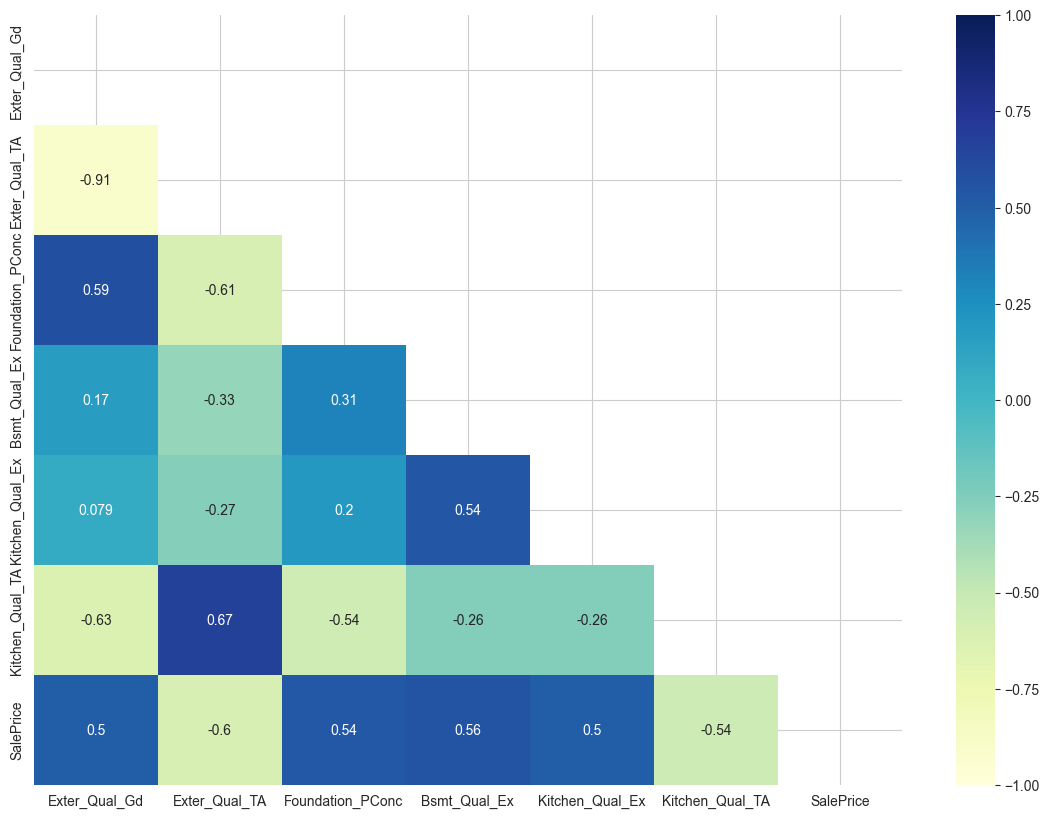

In [59]:
# Visualizing the correlation matrix
cat_corr_matrix = categorical_cols.corr()

plt.figure(figsize=(14,10))
mask = np.triu(np.ones_like(cat_corr_matrix))
sns.heatmap(cat_corr_matrix,
            annot=True,
            mask=mask,
            vmin=-1,
            vmax=1,
            cmap="YlGnBu");

From the following correlation we can see the remaining categorical columns that had a correlation of greater than -0.5 or less than 0.5 to the sales price. From the above matrix, we can see that `Exter_Qual_TA` and `Bsmt_Qual_Ex` had the highest correlation to the sales price of -0.6 and 0.56 respectively. This means that the If your Exterior Quality was rated as TA (Typical/Average) your house price would most likely be lower than if it was rated as Ex (Excellent). Similarly, if your basement quality was rated as Ex (Excellent) your house price would be possibly higher than if it was rated as TA (Typical/Average).

The purpose of conducting the above correlation matrix was to identify the individual values of a column that had a correlation of greater than 0.5 or less than -0.5 to the sales price. 

- In essence, we are performing correlation on the encoded columns so that we can identify and filter which original column label we need to keep and which we need to remove. E.g. `Exter_Qual_Ta` had a correlation of -0.6, so specific values within the `Exter_Qual` column had a correlation greater than our cut-off and we will keep this column in our analysis whilst no element within `Sale_Type` had a correlation greater than our cut-off and we will drop this column from our analysis.

Lastly, similar to the numerical columns, we can see that there are a number of columns that are correlated against each other but we won't be removing them.

In [60]:
# Adding the main columns back to the dataset
categorical_columns = ["Exter_Qual","Bsmt_Qual", "Kitchen_Qual", "Foundation"] 

# Dropping saleprice from df
df_updated.drop(columns=["SalePrice"], inplace=True)

# Join the categorical columns to the df
df_updated = pd.concat([df_updated, df_new[categorical_columns]], axis=1)

# Add saleprice back to the df
df_updated = pd.concat([df_updated, house_price], axis=1)

df_updated.head()

,Overall_Qual,Year_Built,Year_Remod/Add,Total_Bsmt_SF,1st_Flr_SF,Gr_Liv_Area,Full_Bath,Garage_Yr_Blt,Garage_Area,House_Sale_Age,Exter_Qual,Bsmt_Qual,Kitchen_Qual,Foundation,SalePrice
0,6,1960,1960,1080.0,1656,1656,1,1960.0,528.0,50,TA,TA,TA,CBlock,215000
1,5,1961,1961,882.0,896,896,1,1961.0,730.0,49,TA,TA,TA,CBlock,105000
2,6,1958,1958,1329.0,1329,1329,1,1958.0,312.0,52,TA,TA,Gd,CBlock,172000
3,7,1968,1968,2110.0,2110,2110,2,1968.0,522.0,42,Gd,TA,Ex,CBlock,244000
4,5,1997,1998,928.0,928,1629,2,1997.0,482.0,13,TA,Gd,TA,PConc,189900


From the above code blocks, we have been able to filter the data according to columns that have an effect to the sales price.

#### 3.5.3 Changing Data Types

This section will analyze the datatypes of the new dataframe and make sure they are all right before starting the data analysis section.

In [61]:
# New copy of data
df_updated_1 = df_updated.copy()

In [62]:
df_updated_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2837 entries, 0 to 2929
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Overall_Qual    2837 non-null   int64  
 1   Year_Built      2837 non-null   int64  
 2   Year_Remod/Add  2837 non-null   int64  
 3   Total_Bsmt_SF   2837 non-null   float64
 4   1st_Flr_SF      2837 non-null   int64  
 5   Gr_Liv_Area     2837 non-null   int64  
 6   Full_Bath       2837 non-null   int64  
 7   Garage_Yr_Blt   2837 non-null   float64
 8   Garage_Area     2837 non-null   float64
 9   House_Sale_Age  2837 non-null   int64  
 10  Exter_Qual      2837 non-null   object 
 11  Bsmt_Qual       2759 non-null   object 
 12  Kitchen_Qual    2837 non-null   object 
 13  Foundation      2837 non-null   object 
 14  SalePrice       2837 non-null   int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 354.6+ KB


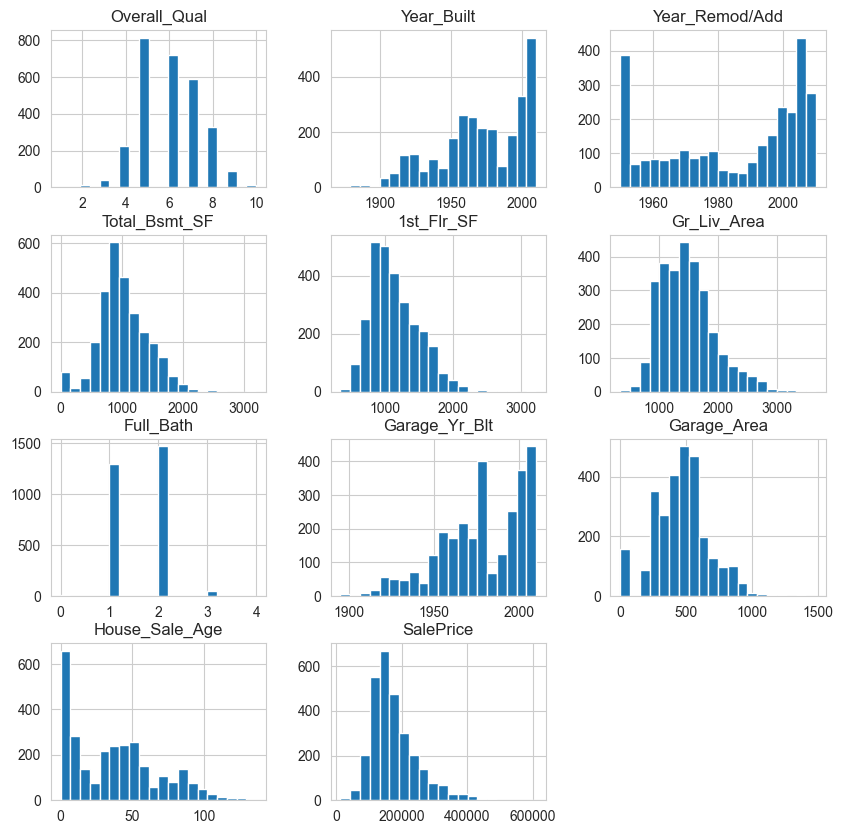

In [63]:
## Quick overview of the distribution of numerical values

df_updated_1.hist(figsize=(10,10), bins=20)
plt.show()

In [64]:
# Columns to change datatypes
dtype_list = ["Overall_Qual", "Full_Bath",]

# Change datatypes but keep original list
for col in dtype_list:
    df_updated_1[col] = df_updated_1[col].astype(str)
    
df_updated_1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2837 entries, 0 to 2929
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Overall_Qual    2837 non-null   object 
 1   Year_Built      2837 non-null   int64  
 2   Year_Remod/Add  2837 non-null   int64  
 3   Total_Bsmt_SF   2837 non-null   float64
 4   1st_Flr_SF      2837 non-null   int64  
 5   Gr_Liv_Area     2837 non-null   int64  
 6   Full_Bath       2837 non-null   object 
 7   Garage_Yr_Blt   2837 non-null   float64
 8   Garage_Area     2837 non-null   float64
 9   House_Sale_Age  2837 non-null   int64  
 10  Exter_Qual      2837 non-null   object 
 11  Bsmt_Qual       2759 non-null   object 
 12  Kitchen_Qual    2837 non-null   object 
 13  Foundation      2837 non-null   object 
 14  SalePrice       2837 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 354.6+ KB


From the above code, we've successfully changed the datatypes of the targeted columns and can continue with our analysis.

## 4. Data Analysis

This section of the report will look at the following:
- Univariate analysis
- Bivariate analysis
- Multivariate analysis (if necessary)

### 4.1 Univariate Analysis

This section of the report will look at the distribution of the data within the dataset. This will help us understand the data better and draw any meaningful conclusions from it.

This section will be divided into 2 parts:
1. Numerical variables
2. Categorical variables

#### 4.1.1 Numerical variables

This section of the report will look at the distribution of the numerical variables within the dataset.

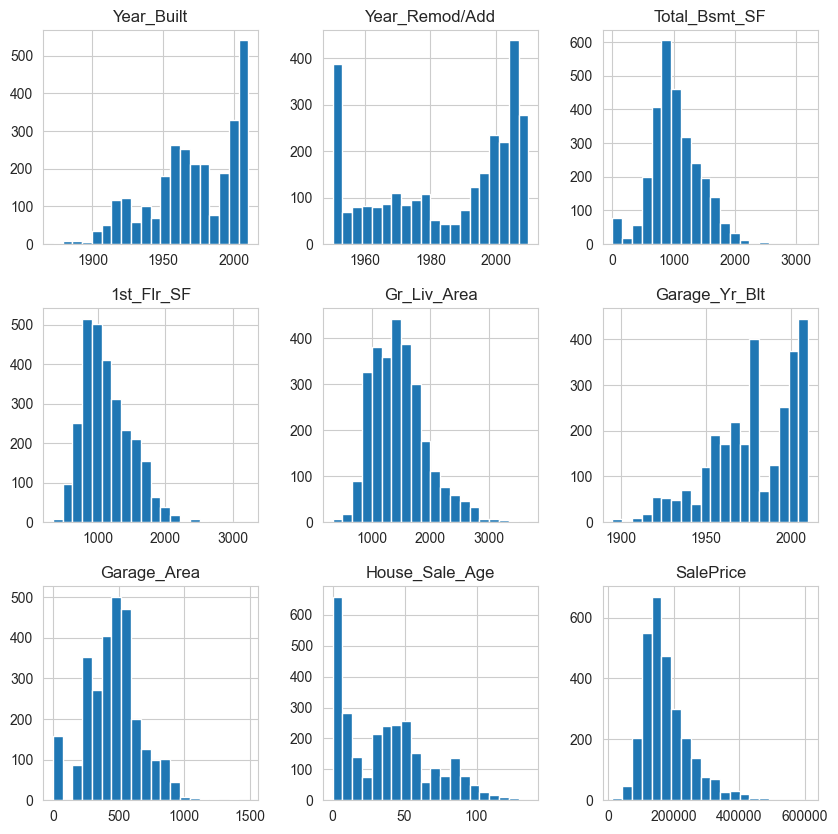

In [65]:
df_updated_1.hist(figsize=(10,10), bins=20)
plt.show()

From the above chart, we can briefly see the overall distribution of the numerical data within our dataframe.

We will dive deeper into each column individually and derive any meaningful insights from them.


##### Year Built

Summary statistics:
count    2837.000000
mean     1970.885090
std        30.294782
min      1872.000000
25%      1953.000000
50%      1972.000000
75%      2000.000000
max      2010.000000
Name: Year_Built, dtype: float64


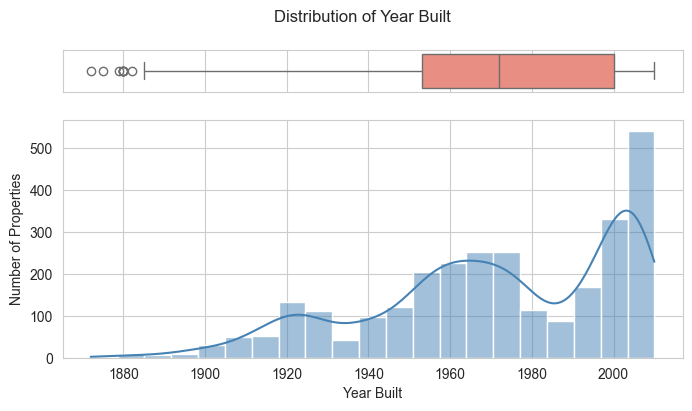

In [66]:
# Plot Year Built
plot_dist(df_updated_1, columns="Year_Built", title="Distribution of Year Built",
          xlabel="Year Built", ylabel="Number of Properties")

From the graph above and the summary statistics we can see that the average year a property was built was 1970. We can also see that the oldest property was built in 1872 and the newest property was built in 2010. There's also a relatively cyclical rise in the number of properties built over the years.

It would be interesting to see if the year a property was built has any effect on the price of the property. We will look at this in the bivariate analysis section of the report.

##### Year Remodelled

Summary statistics:
count    2837.000000
mean     1983.999648
std        20.907910
min      1950.000000
25%      1965.000000
50%      1992.000000
75%      2004.000000
max      2010.000000
Name: Year_Remod/Add, dtype: float64


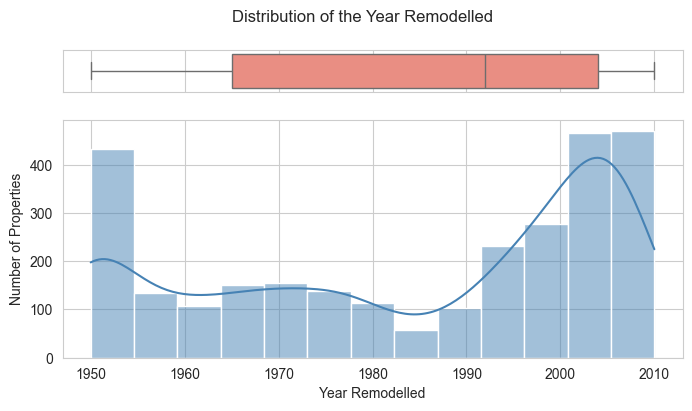

In [67]:
plot_dist(df_updated_1, columns="Year_Remod/Add", title="Distribution of the Year Remodelled", xlabel="Year Remodelled", ylabel="Number of Properties")

From the graph and summary statistics above, we can see that the average year a house was remodelled in the dataset was 1983. The graph is also skewed to the left with a slight peak in 1950. 

From the distribution above, we can also see there were nearly 400 properties were remodelled in 1950 which when compared to the overall trend of the graph doesn't make sense. This most likely could be a combination of houses which were also remodelled before 1950 but no data was available for the exact year or a large number of houses modelled in that specific year for some reason.

##### Total_Bsmt_Sf

Summary statistics:
count    2837.000000
mean     1031.544453
std       406.281126
min         0.000000
25%       784.000000
50%       980.000000
75%      1271.000000
max      3206.000000
Name: Total_Bsmt_SF, dtype: float64


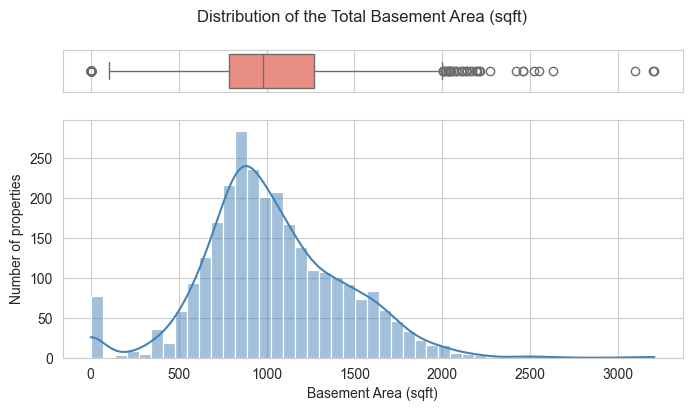

In [68]:
plot_dist(df_updated_1, columns="Total_Bsmt_SF", title="Distribution of the Total Basement Area (sqft)", xlabel="Basement Area (sqft)", ylabel="Number of properties")

The above graph shows us the distribution of the total basement area and we can see the average basement area is 1031 sqft. We can also see that 75% of the properties had a basement area of 1271 sqft and less while the maximum value is 3206 sqft. We can also see that there a few properties that had no basement area at all.

Looking at the graph we can see that the distribution is skewed to the right and that most properties had a basement area of about 1000 sqft. We can also see that there's a tiny peak on the left side of the graph which are the properties that had no basement area at all.

##### 1st_Flr_SF

Summary statistics:
count    2837.000000
mean     1138.887205
std       359.674313
min       334.000000
25%       872.000000
50%      1072.000000
75%      1362.000000
max      3228.000000
Name: 1st_Flr_SF, dtype: float64


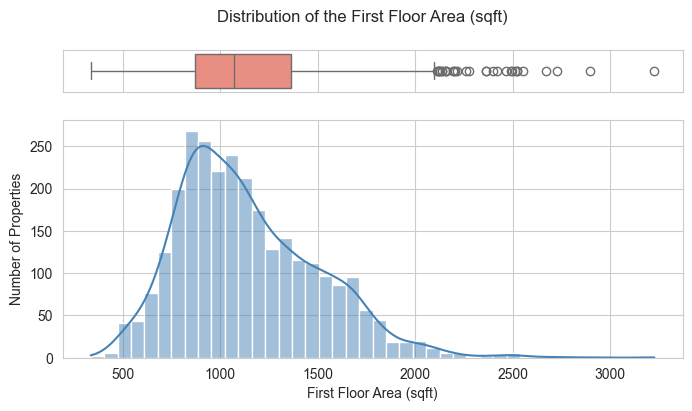

In [69]:
plot_dist(df_updated_1, columns="1st_Flr_SF", title="Distribution of the First Floor Area (sqft)", xlabel="First Floor Area (sqft)", ylabel="Number of Properties")

From the summary statistics above we can see that the average first floor area is 1139 sqft and that 50% (Q3-Q1) of the properties had a first floor area of between 872 sqft and 1362sqft. Wwe can also see that the maximum value is 3228 sqft which is a lot larger than the average and 75% of the properties.

Looking at the graph above we can see that the distribution is skewed to the right as there are more properties on the right side of the graph than the left. This means that there are more properties with a larger first floor area than a smaller one.

##### Gr_Liv_Area

Summary statistics:
count    2837.000000
mean     1473.818118
std       468.491970
min       334.000000
25%      1117.000000
50%      1430.000000
75%      1721.000000
max      3672.000000
Name: Gr_Liv_Area, dtype: float64


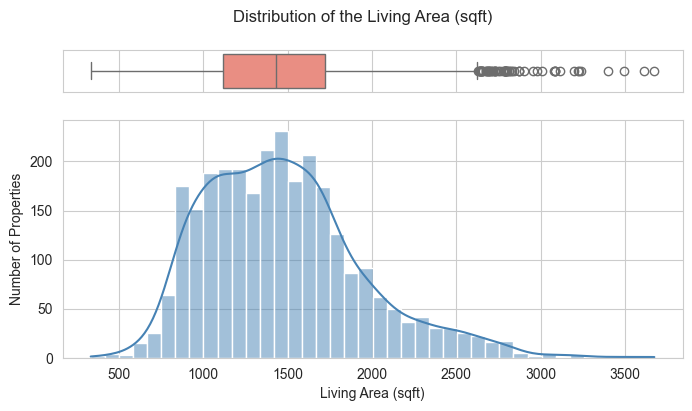

In [70]:
plot_dist(df_updated_1, columns="Gr_Liv_Area", title="Distribution of the Living Area (sqft)", xlabel="Living Area (sqft)", ylabel="Number of Properties")

From the graph above we can see that the distribution is skewed to the right and that most properties have a living area of about 1500 sqft. Looking at the summary statistics we can see that the average living area is 1473 sqft. 

What's interesting is that the minimum living area is 334 sqft which is a lot smaller than the average property. We can also see that 50% (Q3-Q1) of the properties had a living area between 1117 sqft and 1721 sqft which is in line with the graph above.

##### Garage_Yr_Blt 

Summary statistics:
count    2837.000000
mean     1977.837152
std        24.438625
min      1895.000000
25%      1961.000000
50%      1979.000000
75%      2001.000000
max      2010.000000
Name: Garage_Yr_Blt, dtype: float64


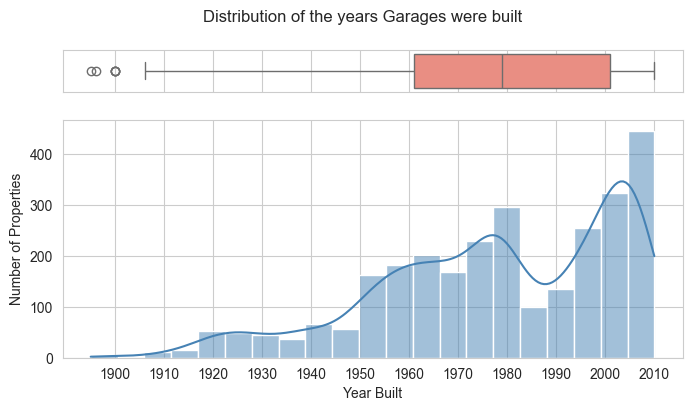

In [71]:
plot_dist(df_updated_1, columns="Garage_Yr_Blt", title="Distribution of the years Garages were built", xlabel="Year Built", ylabel="Number of Properties")
plt.xticks(np.arange(1900, 2011, step=10));

From the above graph we can see that there's a rising trend in the years garage's were built. What's surprising is that there were garages built as early as 1900 and there was a rise in the number of garages built till 1980 then it dropped and rose again to a peak in aroung 2009 and dropped in 2010 most likely due to the financial crisis.

From the summary statisitics we can see that average year a garage was built was 1977 and that 75% of the garages built in this dataset were built before 2001.

##### Garage_Area


Summary statistics:
count    2837.000000
mean      464.403532
std       209.154944
min         0.000000
25%       315.000000
50%       474.000000
75%       576.000000
max      1488.000000
Name: Garage_Area, dtype: float64


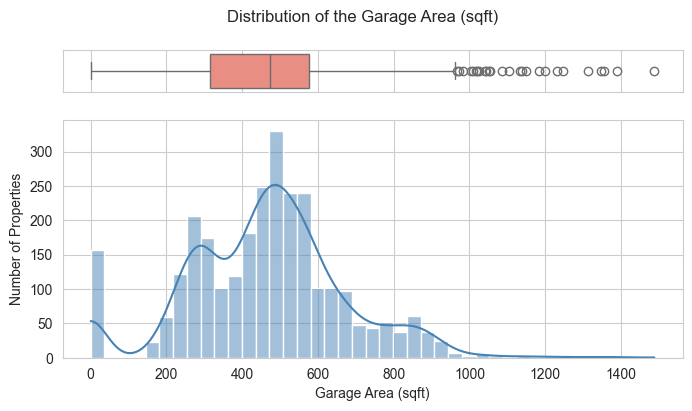

In [72]:
plot_dist(df_updated_1, columns="Garage_Area", title="Distribution of the Garage Area (sqft)", xlabel="Garage Area (sqft)", ylabel="Number of Properties")

From the above graph we can see that the distribution is skewed to the right but has multiple peaks and that most properties had a garage area of about 500 sqft. We can also see that the average garage area is 464 sqft and about 150 properties had no garage area at all. There are also some outliers in the dataset with a garage area of over 1000 sqft which is a lot larger than the average garage area.

##### House Sale Age


Summary statistics:
count    2837.000000
mean       36.911526
std        30.337807
min         0.000000
25%         8.000000
50%        35.000000
75%        55.000000
max       136.000000
Name: House_Sale_Age, dtype: float64


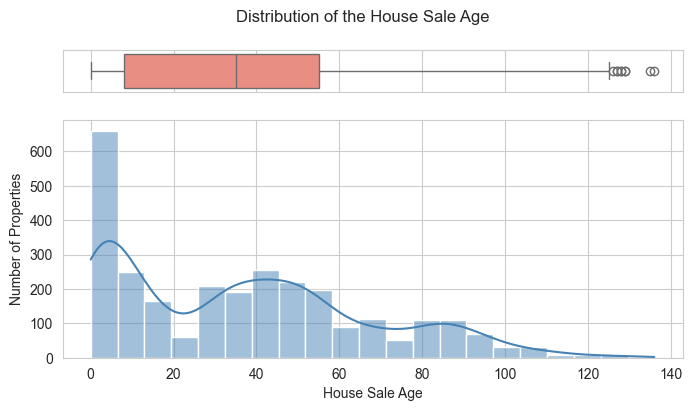

In [73]:
plot_dist(df_updated_1, columns="House_Sale_Age", title="Distribution of the House Sale Age", xlabel="House Sale Age", ylabel="Number of Properties")

From the summary statistics above we can see that the average age of a house when it is sold is 36.9 years while 75% of the properties which were sold were 55 years or less. 

The data is skewed to the right with the majority of the properties being sold at a relatively young age. We can also see that there are some properties that were sold at an age of over 100 years which is a lot older than the average age of a property when it is sold.



In [74]:
# Function to plot the distribution of categorical values
def plot_discrete_values(df:pd.DataFrame, columns:str, title:str, xlabel:str, ylabel:str):
    """
    This function plots the distribution of categorical values in a dataframe.
    
    :param df: Dataframe to be used
    :param columns: Columns for visualizing
    :param title: Title for distribution
    :param xlabel: X label 
    :param ylabel: Y label
    
    """
    print("Summary statistics:")
    print(df[columns].value_counts())

    # order of the bars
    #df[columns] = pd.to_numeric(df[columns])
    bars = df.groupby(columns).size().sort_index().index

    fig, ax = plt.subplots(figsize=(8,4))
    sns.countplot(data=df, x=columns, ax=ax, color="salmon", order=bars)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);


# Function to plot the distribution of categorical values
def plot_cat_values(df:pd.DataFrame, columns:str, title:str, xlabel:str, ylabel:str):
    """
    This function plots the distribution of categorical values in a dataframe.
    
    :param df: Dataframe to be used
    :param columns: Columns for visualizing
    :param title: Title for distribution
    :param xlabel: X label 
    :param ylabel: Y label
    
    """
    print("Summary statistics:")
    print(df[columns].value_counts(dropna=False))

    # order of the bars
    #df[columns] = pd.to_numeric(df[columns])
    bars = df.groupby(columns).size().sort_values(ascending=False).index

    fig, ax = plt.subplots(figsize=(8,4))
    sns.countplot(data=df, x=columns, ax=ax, color="salmon", order=bars)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

##### Overall Quality

Summary statistics:
Overall_Qual
5     813
6     720
7     590
8     329
4     224
9      90
3      39
10     15
2      13
1       4
Name: count, dtype: int64


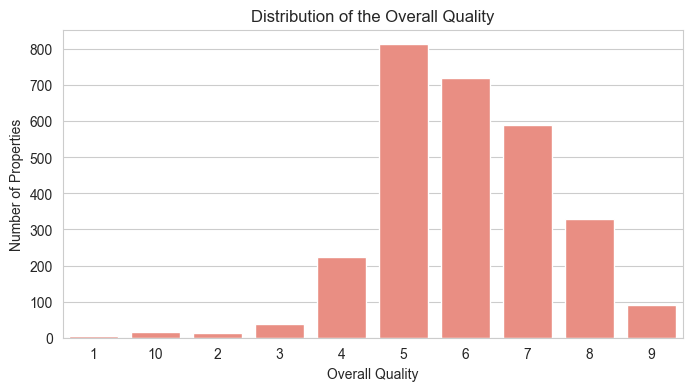

In [75]:
plot_discrete_values(df_updated_1, columns="Overall_Qual", title="Distribution of the Overall Quality", 
                xlabel="Overall Quality", ylabel="Number of Properties")

From the distribution above we can see that 813 properties had an overall quality of 5 which is the most common quality. We can also see that the most common quality is 5 followed by 6 and 7. We can also see that there are very few properties with very low overall qualities or an excellent quality of 10.

##### Full Bath

Summary statistics:
Full_Bath
2    1471
1    1301
3      50
0      11
4       4
Name: count, dtype: int64


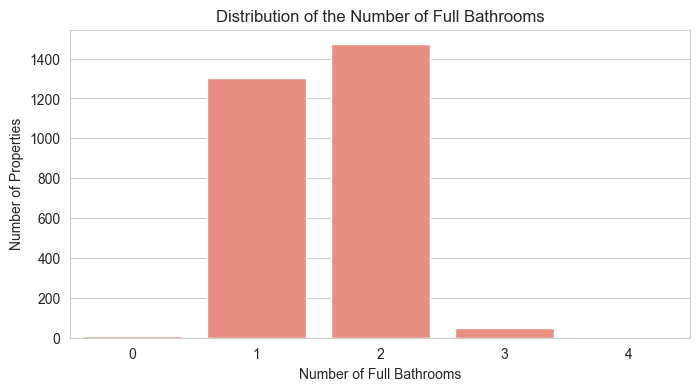

In [76]:
plot_discrete_values(df_updated_1, columns="Full_Bath", title="Distribution of the Number of Full Bathrooms", 
                xlabel="Number of Full Bathrooms", ylabel="Number of Properties")

From the above graph, we can see that most nearly all properties have either 1 or 2 full bathrooms. We can also see that there are very few properties with 3 or 4 full bathrooms. What's surprising is that there are some properties with 0 full bathrooms which is very unlikely. 

#### 4.1.2 Categorical Variables

This section of the report will look at the distribution of the categorical variables within the dataset. 
Despite `Neighborhood` having a low correlation, we will add it back for our analysis as it was part of our research question.

In [77]:
# Adding Neighborhood back
df_updated_1["Neighborhood"] = df_new["Neighborhood"]

In [78]:
# Overview of categorical columns
df_updated_1.select_dtypes(include=["object"]).head()

,Overall_Qual,Full_Bath,Exter_Qual,Bsmt_Qual,Kitchen_Qual,Foundation,Neighborhood
0,6,1,TA,TA,TA,CBlock,NAmes
1,5,1,TA,TA,TA,CBlock,NAmes
2,6,1,TA,TA,Gd,CBlock,NAmes
3,7,2,Gd,TA,Ex,CBlock,NAmes
4,5,2,TA,Gd,TA,PConc,Gilbert


In [79]:
# Number of values in each column
df_updated_1.select_dtypes(include=["object"]).nunique()

Overall_Qual    10
Full_Bath        5
Exter_Qual       4
Bsmt_Qual        5
Kitchen_Qual     5
Foundation       6
Neighborhood    28
dtype: int64

##### Neighborhood

Summary statistics:
Neighborhood
NAmes      437
CollgCr    267
OldTown    238
Edwards    190
Somerst    176
Gilbert    161
Sawyer     151
NridgHt    147
NWAmes     129
SawyerW    125
Mitchel    111
BrkSide    108
Crawfor    101
IDOTRR      92
Timber      61
NoRidge     54
SWISU       48
StoneBr     44
MeadowV     37
ClearCr     36
BrDale      30
Blmngtn     28
NPkVill     23
Veenker     22
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64


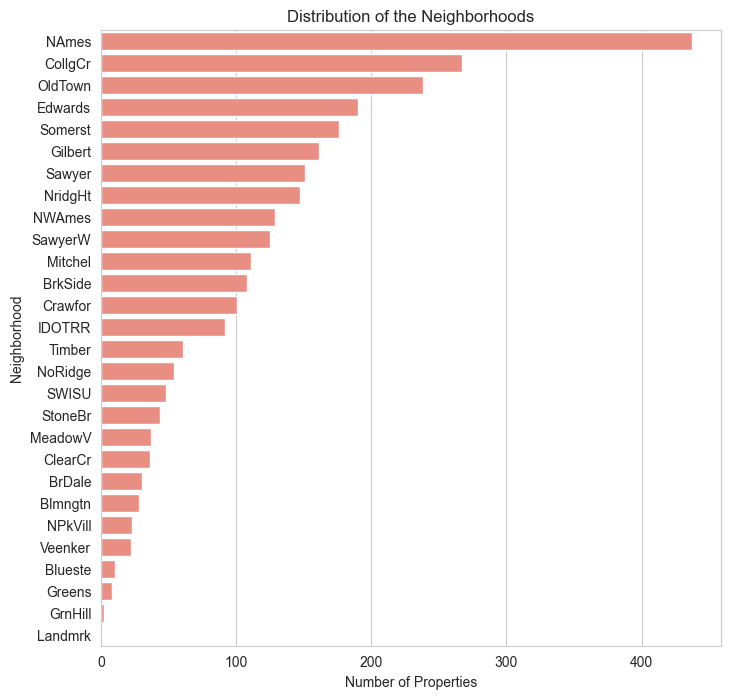

In [80]:
# Horizontal bar chart of the neighborhood

fig, ax = plt.subplots(figsize=(8,8))

print("Summary statistics:")
print(df_updated_1["Neighborhood"].value_counts())

sns.countplot(data=df_updated_1, y="Neighborhood", color="salmon", order=df_updated_1["Neighborhood"].value_counts().index)
plt.title("Distribution of the Neighborhoods")
plt.xlabel("Number of Properties")
plt.ylabel("Neighborhood");

From the above graph we can see that the most common neighborhood is North Ames with 437 properties followed by College Creek with 267 and Old Town at 238. We can also see that there are some neighborhoods with very few properties like Green Hills and Landmark.

##### Exter_Qual

Summary statistics:
Exter_Qual
TA    1767
Gd     954
Ex      81
Fa      35
Name: count, dtype: int64


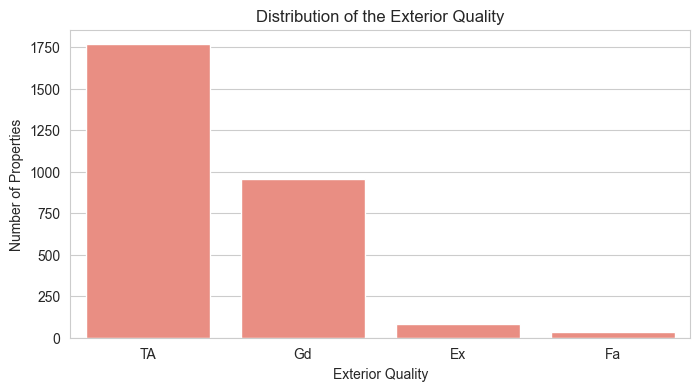

In [81]:
plot_cat_values(df_updated_1, columns="Exter_Qual", title="Distribution of the Exterior Quality", 
                xlabel="Exterior Quality", ylabel="Number of Properties")

The above graph shows that the most common exterior quality is TA (Typical/Average) followed by Gd (Good). We can also see that there are very few properties with an excellent quality or a fair quality. It would be interesting to see how much of an effect the excellent exterior quality has on the price of a property.

##### Bsmt_Qual

Summary statistics:
Bsmt_Qual
TA     1266
Gd     1183
Ex      220
Fa       88
NaN      78
Po        2
Name: count, dtype: int64


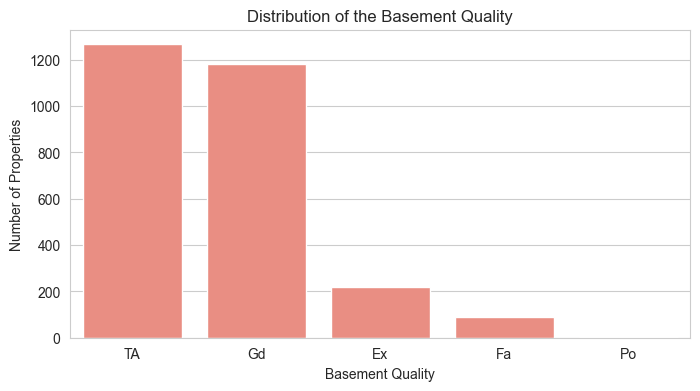

In [82]:
plot_cat_values(df_updated_1, columns="Bsmt_Qual", title="Distribution of the Basement Quality", 
                xlabel="Basement Quality", ylabel="Number of Properties")

From the above graph we see that 1,266 properties basement qualities was classified as TA (Typical/Average) closely followed by Gd (Good) at 1,183. We can also see that very few properties rated as excellent or fair with only 2 properties having a poor basement quality.

##### Kitchen_Qual

Summary statistics:
Kitchen_Qual
TA    1469
Gd    1125
Ex     172
Fa      70
Po       1
Name: count, dtype: int64


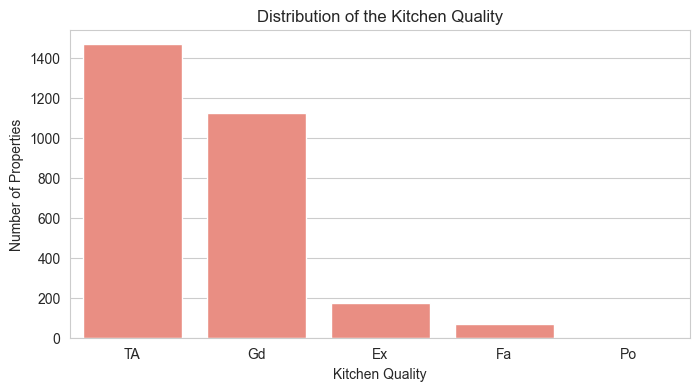

In [83]:
plot_cat_values(df_updated_1, columns="Kitchen_Qual", title="Distribution of the Kitchen Quality", 
                xlabel="Kitchen Quality", ylabel="Number of Properties")

From the above graph we can see that the most common kitchen quality is TA (Typical/Average) at 1469 properties followed by Gd (Good) at 1125. We can also see that there are very few properties with an excellent kitchen quality or a fair kitchen quality. Only 1 property had their kitchen quality rated as poor.

##### Foundation

Summary statistics:
Foundation
PConc     1247
CBlock    1217
BrkTil     309
Slab        48
Stone       11
Wood         5
Name: count, dtype: int64


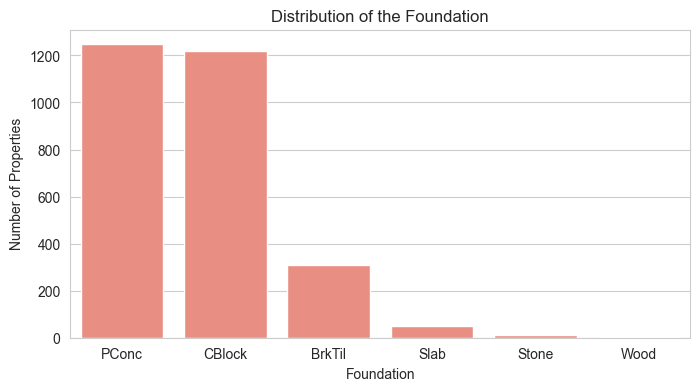

In [84]:
plot_cat_values(df_updated_1, columns="Foundation", title="Distribution of the Foundation", 
                xlabel="Foundation", ylabel="Number of Properties")

From the above graph we can see that the most common foundation type is PConc (Poured Contrete) at 1247 properties closely followed by CBlock (Cinder Block) at 1217. We can also see that there are very few properties with either a slab, stone or wood foundation. 


### 4.2 Bivariate Analysis

This section will analyze the relationship between our target variable (Sale Price) and the other variables within the dataset. This will help us understand the relationship between the variables and the target variable and draw any meaningful conclusions from it.

It's also important to note that despite the trends we may see in the bivariate analysis, we cannot draw any conclusions on the causation of the trends. This is because correlation does not imply causation.

According to Kumar, (2022b), he provides a recommendation to conducting bivariate analysis and the methods to use. The following section will follow his recommendations:
1. Numerical continuous variables: Scatter plots or line plots
2. Numerical discrete variables: Boxplots or violin plots
3. Categorical continuous variables: Boxplots, bar plots or violin plots
4. Categorical discrete variables: Bar plots, crosstab or stacked bar plots 

In [85]:
# Overview of dataset
df_updated_1.head()

,Overall_Qual,Year_Built,Year_Remod/Add,Total_Bsmt_SF,1st_Flr_SF,Gr_Liv_Area,Full_Bath,Garage_Yr_Blt,Garage_Area,House_Sale_Age,Exter_Qual,Bsmt_Qual,Kitchen_Qual,Foundation,SalePrice,Neighborhood
0,6,1960,1960,1080.0,1656,1656,1,1960.0,528.0,50,TA,TA,TA,CBlock,215000,NAmes
1,5,1961,1961,882.0,896,896,1,1961.0,730.0,49,TA,TA,TA,CBlock,105000,NAmes
2,6,1958,1958,1329.0,1329,1329,1,1958.0,312.0,52,TA,TA,Gd,CBlock,172000,NAmes
3,7,1968,1968,2110.0,2110,2110,2,1968.0,522.0,42,Gd,TA,Ex,CBlock,244000,NAmes
4,5,1997,1998,928.0,928,1629,2,1997.0,482.0,13,TA,Gd,TA,PConc,189900,Gilbert


Similar to the univariate section, we will divide this section into 2 parts for ease of analysis:
1. Numerical variables
2. Categorical variables

In [86]:
# Function to plot the relationship between the sales price and other numerical variables
def plot_num_bivariate(df:pd.DataFrame, columns:str, title:str, xlabel:str, ylabel:str):
    """
    This function plots the relationship between the sales price and other numerical variables.
    
    :param df: Dataframe to be used
    :param columns: Columns for visualizing
    :param title: Title for distribution
    :param xlabel: X label 
    :param ylabel: Y label
    
    """
    fig, ax = plt.subplots(figsize=(8,4))

    # Calculate correlation
    bivariate_corr = df[columns].corr(df["SalePrice"])
    
    #Plot scatter plot and line of best fit
    sns.scatterplot(data=df, x=columns, y="SalePrice", ax=ax)
    sns.regplot(data=df, x=columns, y="SalePrice", scatter=False,
                color="red", label=f"Correlation: {bivariate_corr:.2f}")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend();


def plot_cat_bivariate(df:pd.DataFrame, x_value:str, title:str, xlabel:str, ylabel:str):
    """
    This function a boxplot to show the relationship between the sales price and other categorical variables.
    
    :param df: Dataframe to be used
    :param columns: Columns for visualizing
    :param title: Title for distribution
    :param x_value: X value
    :param xlabel: X label 
    :param ylabel: Y label
    
    """
    fig, ax = plt.subplots(figsize=(5,4))

    # Arrange boxplot by index
    # df_arranged = df.sort_values(by=x_value)

    #Plot boxplot
    sns.boxplot(data=df.sort_values(by=x_value, ascending=True), x=x_value, 
                y="SalePrice", ax=ax, color="salmon")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

#### 4.2.1 Numerical Variables

This section will look at the relationship between the sales price and the other numerical variables within the dataset 

##### Year Built

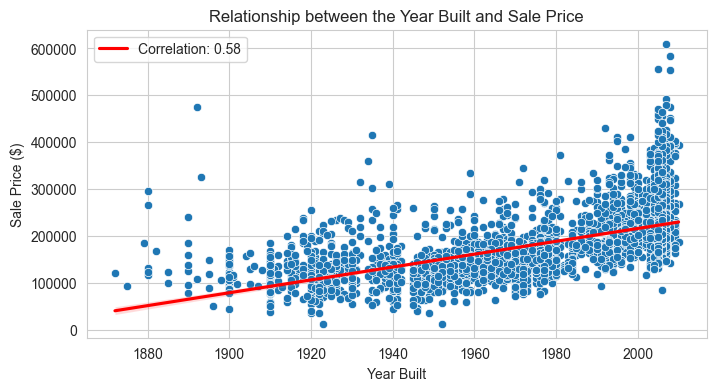

In [87]:
plot_num_bivariate(df_updated_1, columns="Year_Built", title="Relationship between the Year Built and Sale Price", 
                   xlabel="Year Built", ylabel="Sale Price ($)")

From the scatter plot above, we can see there is a moderate positive correlation between the sale price of a property and the year it was constructed of 0.58. This can imply that the newer the property, there is a tendency for the sale price to rise though not always the case as there are multiple properties in each year that are sold for a wide range of prices either higher or lower than the average price for that year.

##### Year Remodelled

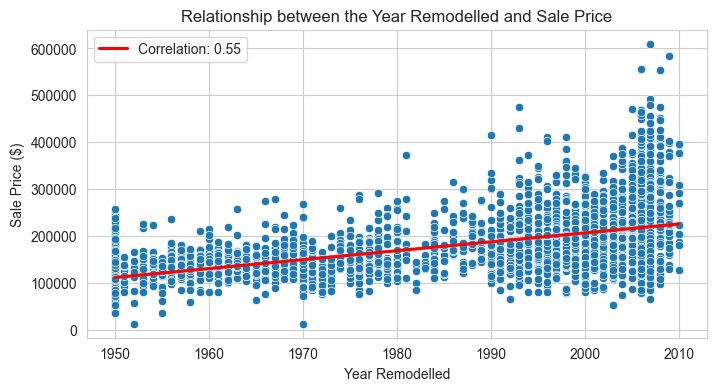

In [88]:
plot_num_bivariate(df_updated_1, columns="Year_Remod/Add", title="Relationship between the Year Remodelled and Sale Price", 
                   xlabel="Year Remodelled", ylabel="Sale Price ($)")

Similar to the year built, there is a moderate correlation between the sale price and the year a property a house was remodelled of 0.55. This shows a slight tendency that a newer remodelled house will have a higher sale price than an older remodelled house. 

##### Total_Bsmt_SF

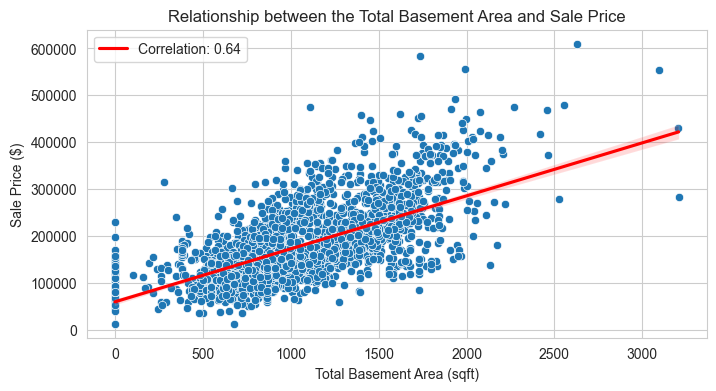

In [89]:
plot_num_bivariate(df_updated_1, columns="Total_Bsmt_SF", title="Relationship between the Total Basement Area and Sale Price", 
                   xlabel="Total Basement Area (sqft)", ylabel="Sale Price ($)")

The scatter plot above shows that there is a moderately high positive correlation between the sale price and the total basement area of 0.64. This shows that there is a tendency for the sale price of a property to increase with an increase in the total basement area. This is makes sense as a large basement area would most likely mean a larger property and a larger property would most likely have a higher sale price.

##### 1st_Flr_SF

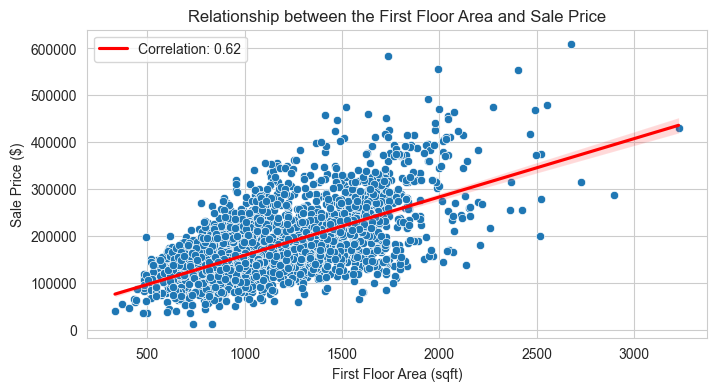

In [90]:
plot_num_bivariate(df_updated_1, columns="1st_Flr_SF", title="Relationship between the First Floor Area and Sale Price", 
                   xlabel="First Floor Area (sqft)", ylabel="Sale Price ($)")

Similar to the total basement area, there is a moderately high positive correlation between the sale price and the first floor area of 0.62. This shows that there is a tendency for the sale price of a property to increase with an increase in the first floor area. Following a similar logic, the larger the first floor area, the larger the property and the higher the sale price.

##### Gr_Liv_Area  

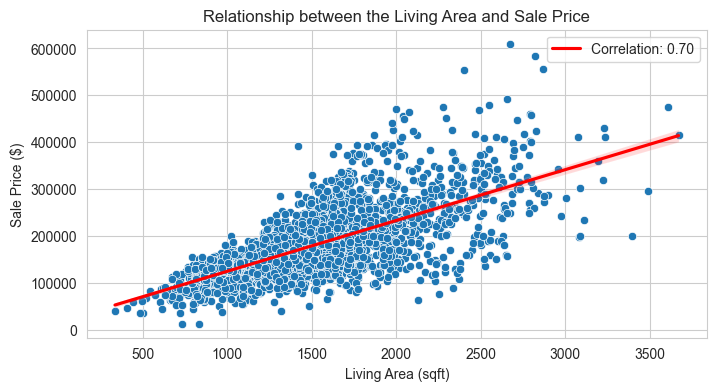

In [91]:
plot_num_bivariate(df_updated_1, columns="Gr_Liv_Area", title="Relationship between the Living Area and Sale Price", 
                   xlabel="Living Area (sqft)", ylabel="Sale Price ($)")

The scatter plot above ties in with the above 2 plots of the basement area and the first floor area. There is a strong positive correlation between the sale price and the living area of 0.70. This shows that there is a strong likelihood for the sale price of a property to increase with an increase in the living area. 

The living area is a combination of the basement area and the first floor area and it makes sense that the larger the living area, the larger the property and the higher the sale price. 

We can make a conclusion that the larger the living area, the higher the sale price of a property.

##### Garage_Yr_Blt

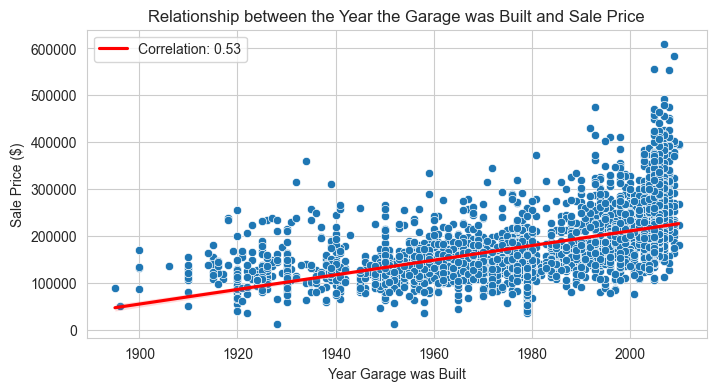

In [92]:
plot_num_bivariate(df_updated_1, columns="Garage_Yr_Blt", title="Relationship between the Year the Garage was Built and Sale Price",
                   
                   xlabel="Year Garage was Built", ylabel="Sale Price ($)")

From the above scatter plot we can see there is a weak positive correlation between the sale price and the year the garage was built of 0.53. This shows that there is a slight likelihood for the sale price of a property to increase with an increase in the year the garage was built but more factors need to be considered to fully understand the relationship between the 2 variables.

##### Garage_Area

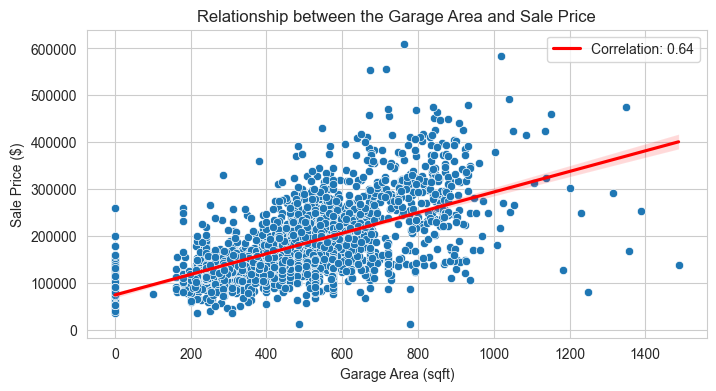

In [93]:
plot_num_bivariate(df_updated_1, columns="Garage_Area", title="Relationship between the Garage Area and Sale Price", 
                   xlabel="Garage Area (sqft)", ylabel="Sale Price ($)")

From the scatter plot above, we can see that a property with a larger garage area would most likely have a higher sale price than a property with a smaller garage area as they have a correlation of 0.64 which is moderately high. This is because a larger garage area would most likely mean a larger property and a higher sale price. 

Interestingly, there are some properties with a garage area of over 1200 sqft but a sale sale price of less than 200,000 dollars. This could be due to the fact that the garage area is not the only factor that affects the sale price of a property.

##### House Sale Age

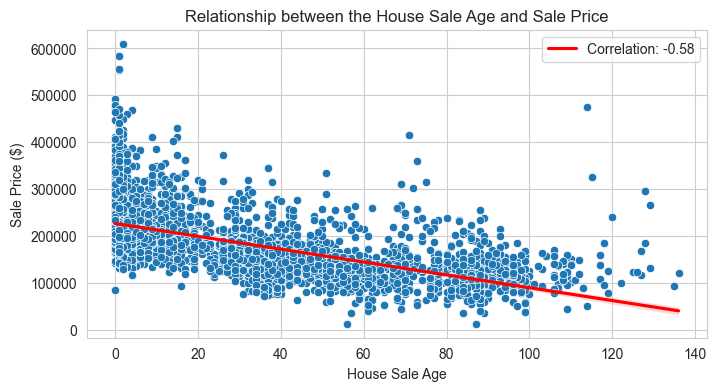

In [94]:
plot_num_bivariate(df_updated_1, columns="House_Sale_Age", title="Relationship between the House Sale Age and Sale Price", 
                   xlabel="House Sale Age", ylabel="Sale Price ($)")

The scatter plot above presents an interesting insight, the older a property is during the time of sale, the lower the sale price of the property. This can be seen with the trend of the line and a moderately high negative correlation of -0.58. 

There are a few properties that are old but have a high sale price but this could be due to multiple other factors that influence their sale price. Generally , the older a property is, 

##### Overall Quality


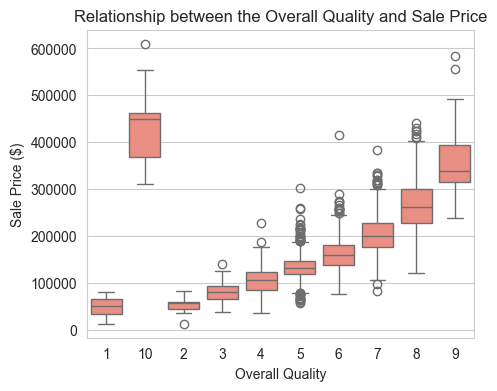

In [95]:
plot_cat_bivariate(df_updated_1, x_value="Overall_Qual", title="Relationship between the Overall Quality and Sale Price", 
                   xlabel="Overall Quality", ylabel="Sale Price ($)")

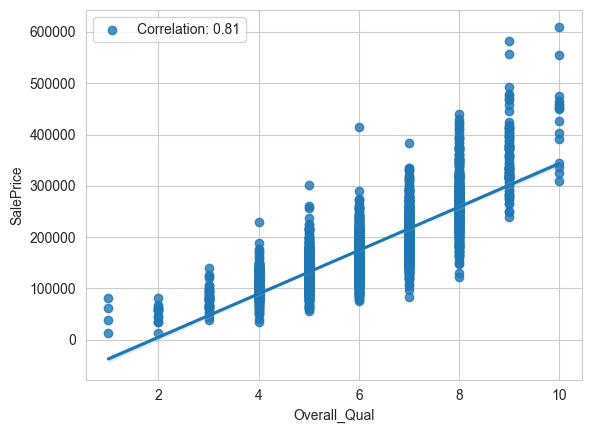

In [115]:
sns.regplot(df_new, x="Overall_Qual", y="SalePrice",
            label=f"Correlation: {df_new['Overall_Qual'].corr(df_new['SalePrice']):.2f}")
plt.legend();

From the above box plot we can see that the higher the overall quality of a property, the higher the median sale price of the property. This is because a property with a higher overall quality would most likely be a larger property and have a higher sale price. We can also see that there is a very strong correlation between the overall quality and the sale price of a property of 0.80. This shows that there is a very strong likelihood for the sale price of a property to increase with an increase in the overall quality of the property.

##### Full Bath

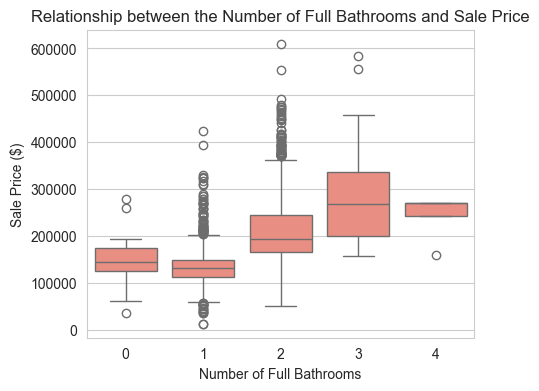

In [97]:
plot_cat_bivariate(df_updated_1, x_value="Full_Bath", title="Relationship between the Number of Full Bathrooms and Sale Price", 
                   xlabel="Number of Full Bathrooms", ylabel="Sale Price ($)")

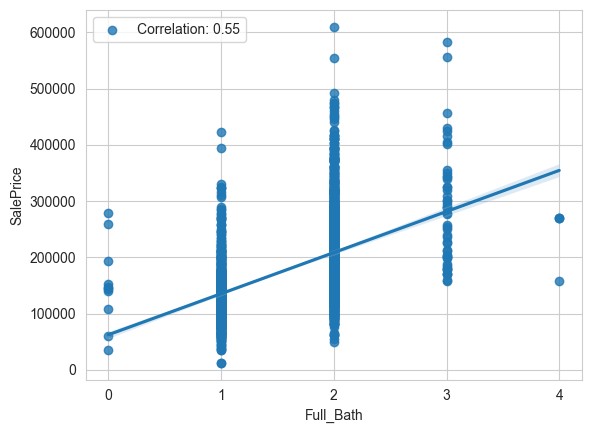

In [121]:
sns.regplot(df_new, x="Full_Bath", y="SalePrice",
            label=f"Correlation: {df_new['Full_Bath'].corr(df_new['SalePrice']):.2f}")
plt.xticks(np.arange(0, 5, step=1))
plt.legend();

From the above box plot we can see that the more full bathrooms a properety has the higher the median sale price of the property, though small. This is because a property with more full bathrooms would most likely be a larger property and have a higher sale price.
There are though a few outliers as we can see that the property with the highest sale price had 2 full bathrooms and the one with the least sale price had 1 full bathroom instead of 0.

We can also see that there's a moderate correlation between the number of full bathrooms and the sale price of a property of 0.55. This shows that there is a moderate likelihood for the sale price of a property to increase with an increase in the number of full bathrooms. There are only 2 properties with 4 full baths so this will skew the correlation a bit.

#### 4.2.2 Categorical Variables

This section will look at the relationship between the sales price and the other categorical variables within the dataset



In [98]:
# Catetgorical columns
df_updated_1.select_dtypes(include=["object"]).head()

,Overall_Qual,Full_Bath,Exter_Qual,Bsmt_Qual,Kitchen_Qual,Foundation,Neighborhood
0,6,1,TA,TA,TA,CBlock,NAmes
1,5,1,TA,TA,TA,CBlock,NAmes
2,6,1,TA,TA,Gd,CBlock,NAmes
3,7,2,Gd,TA,Ex,CBlock,NAmes
4,5,2,TA,Gd,TA,PConc,Gilbert


##### Neighborhood

In [99]:
df_updated_1["Neighborhood"].value_counts()

Neighborhood
NAmes      437
CollgCr    267
OldTown    238
Edwards    190
Somerst    176
Gilbert    161
Sawyer     151
NridgHt    147
NWAmes     129
SawyerW    125
Mitchel    111
BrkSide    108
Crawfor    101
IDOTRR      92
Timber      61
NoRidge     54
SWISU       48
StoneBr     44
MeadowV     37
ClearCr     36
BrDale      30
Blmngtn     28
NPkVill     23
Veenker     22
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64

As we have 28 neighborhoods in our dataset, we will split them into 2 groups of 14 neighborhoods each to make it easier to visualize the relationship between the sale price and the neighborhood.

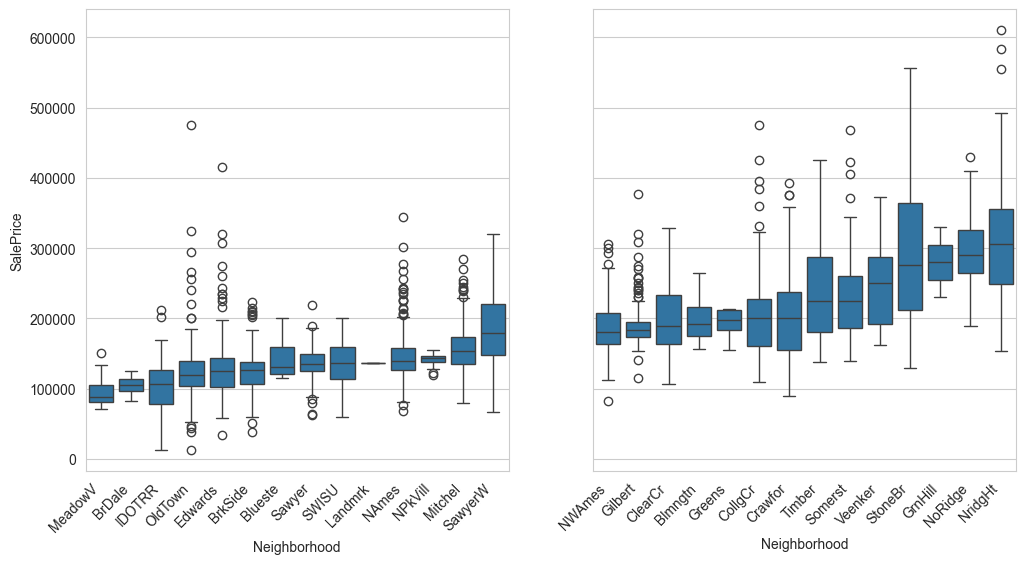

In [124]:
# Sort neighborhoods in ascending order
sorted_neighborhoods = df_updated_1.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=True)

# Create a figure with two subplots (2 columns)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Plot the left plot
start = 0
end = len(sorted_neighborhoods) // 2
subset_1 = sorted_neighborhoods.index[start:end]
df_subset_1 = df_updated_1[df_updated_1['Neighborhood'].isin(subset_1)]
sns.boxplot(data=df_subset_1, x='Neighborhood', y='SalePrice', order=subset_1, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right');

# Similar plot on right with other neighborhoods
new_start = end
new_end = len(sorted_neighborhoods)
subset_2 = sorted_neighborhoods.index[new_start:new_end]
df_subset_2 = df_updated_1[df_updated_1['Neighborhood'].isin(subset_2)]
sns.boxplot(data=df_subset_2, x='Neighborhood', y='SalePrice', order=subset_2, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right');

Based of the distribution above, we can see that the neighborhood with the highest median sale price is Northridge Heights ar around $ 300,000. We can also see despite North Ames having the most properties, its median sale price isn't the highest.

Based of the graphs above, we can make some general conclusions such as owning a property either in Stone Brook, Green Hills, Northridge or Northridge Heights would most likely mean a higher sale price than owning a property in College Creek, Old Town or the most populous area North Ames.

##### Exter_Qual

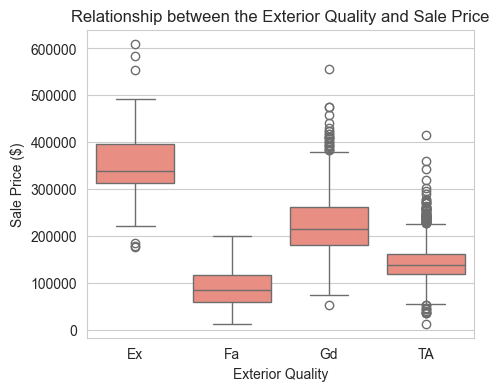

In [101]:
plot_cat_bivariate(df_updated_1, x_value="Exter_Qual", title="Relationship between the Exterior Quality and Sale Price", 
                   xlabel="Exterior Quality", ylabel="Sale Price ($)")

From the above box plot, we can see that the better exterior quality a property has the higher the median sale price of the property. This is because a property with a better exterior quality would most likely look more appealing and sell for a higher price than one that doesn't look as good.

THis can be seen when comparing the median values of the properties. An excellent exterior quality house had a median value of over $ 300,000 while one that was good was around $ 200,000 and one that was typical/average was around $150,000. This declining trend shows that the better the exterior quality, the higher the sale price of the property.

##### Bsmt_Qual

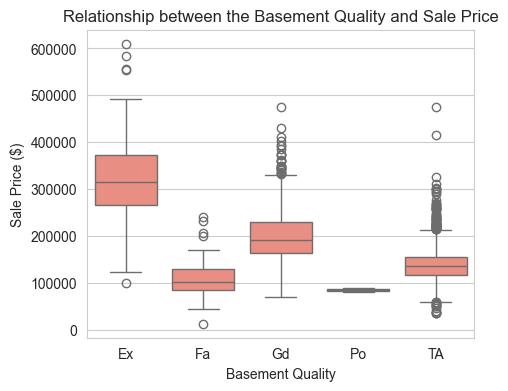

In [102]:
plot_cat_bivariate(df_updated_1, x_value="Bsmt_Qual", title="Relationship between the Basement Quality and Sale Price", 
                   xlabel="Basement Quality", ylabel="Sale Price ($)")

Similar to the exterior quality, we can draw similar findings as seen on the box plot above. The better rated a properties basement quality is, the higher the median sale price of the property. We can see a similar trend as porperties with excellent basement qualitie were sold for around $300,000 while those with either a good rating or a typical/average rating were sold for around $200,000 and around $150,000 respectively.

##### Kitchen_Qual

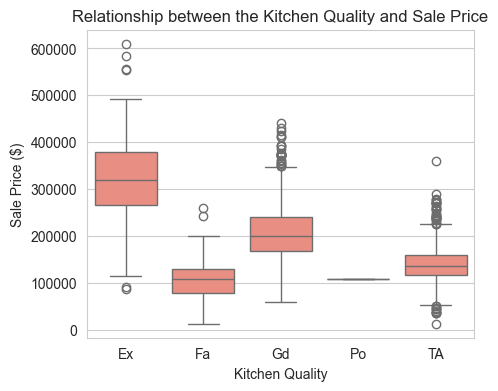

In [103]:
plot_cat_bivariate(df_updated_1, x_value="Kitchen_Qual", title="Relationship between the Kitchen Quality and Sale Price", 
                   xlabel="Kitchen Quality", ylabel="Sale Price ($)")

Similar findings can be made about the kitchen quality. The better rated your kitchen is there is a higher chance it will be sold for a higher price. We can see that properties with an excellent kitchen quality were sold for around $ 300,000 while those with a good rating were sold for around $ 200,000 and those with a typical/average rating were sold for around $ 150,000.

We can make a general conclusion that the higher rating a property is given whether the kitchen,  basement or exterior quality, the higher the sale price of the property.

##### Foundation

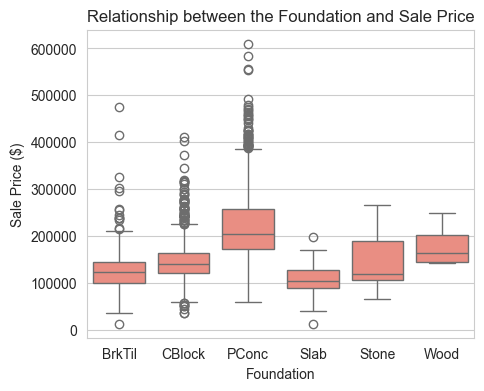

In [104]:
plot_cat_bivariate(df_updated_1, x_value="Foundation", title="Relationship between the Foundation and Sale Price", 
                   xlabel="Foundation", ylabel="Sale Price ($)")

From the above box plot we can see that the foundation that had the highest median sale price was PCon (poured concrete) at around \\$200,000. We can also see that the foundation that had the lowest median sale price was Slab at around \\$100,000.

However, there isn't much difference between the different foundation types and the sale price, so the foundation type doesn't have that much of an effect on the sale price of a property.

## 5. Findings & Recommendations

Based of our analysis above (univariate and bivariate), we can make the following findings:
The numerical factors found to have an effect to the sale price of a property include: 

|   Numerical Variable   |   Correlation   |
|:----------------------:|:---------------:|
|       Year Built       |      0.58       |
|    Year Remodelled     |      0.55       |
|  Total Basement Area   |      0.64       |
|    First Floor Area    |      0.62       |
|      Living Area       |      0.70       |
|      Garage Area       |      0.64       |
|     House Sale Age     |      -0.58      |
|    Overall Quality     |      0.80       |
|       Full Bath        |      0.55       |




- A house that has either a larger basement area, first floor area or living area would most likely have a higher sale price than a similar house with a smaller area. This was seen as a the sales price correlation coefficient was 0.64, 0.62 and 0.70 respectively.
    - In regards to living area, it can be interpreted as for every unit(sqft) increase in the living area, the sales price of the property will increase by 0.70 units (\\$).
-   A larger garage area can mean a larger property and has a positive correlation to the sale price of a property. 
- What was most interesting was that the older a house was, it had a negative effect on the sales price of a property as seen by the correlation coefficient of -0.58.
- The overall quality of a property had the highest correlation coefficient of 0.80 which shows that the better the overall quality of a property, the higher the sale price of the property.
- Based of the neighborhoods, it was seen that the neighborhood with the highest median sale price was Northridge Heights at around \\$ 300,000. We can also see despite North Ames having the most properties, its median sale price isn't the highest.
- For a property to have a higher sales price, the exterior quality, basement quality and kitchen quality should be rated as excellent. This was seen as properties which these 3 factors were rates as excellent had the highest median sale price of around \\$ 300,000.

## References

BecomingHuman.ai (2020) Outlier detection in real estate data, Medium. Available at: https://becominghuman.ai/outlier-detection-in-real-estate-data-4e7375e2c8ba (Accessed: 05 November 2023).

Clear Capital (2023) Above Grade Square Feet, ClearCapital.com, Inc. Available at: https://www.clearcapital.com/resources/glossary-of-terms/above-grade-square-feet/#:~:text=Above%20Grade%20Square%20Feet%20is,finished%20walkout%20or%20daylight%20basement. (Accessed: 18 November 2023). 

Kumar, A. (2023a) Python - replace missing values with mean, median &amp; mode, Analytics Yogi. Available at: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/ (Accessed: 11 November 2023)

Kumar, A. (2022b) A quick guide to bivariate analysis in python, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2022/02/a-quick-guide-to-bivariate-analysis-in-python/ (Accessed: 19 November 2023). 

Smart Vision (2020) CRISP DM methodology, Smart Vision Europe. Available at: https://www.sv-europe.com/crisp-dm-methodology/ (Accessed: 17 November 2023). 

Whitegates (2022) 7 things your estate agent will look for when valuing your home, Whitegates. Available at: https://www.whitegates.co.uk/news/seven-things-your-estate-agent-will-look-for-when-valuing-your-home-8228 (Accessed: 15 November 2023). 

